In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
pd.options.display.float_format = "{:.2f}".format
import matplotlib.style as style; style.use('fivethirtyeight')
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
cf.set_config_file(theme="solar")
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output# Load Data
import base64

Modules: 
    
Numpy, Pandas {data analysis}, matplotlib,Seaborn  :{ Basic-Plotting,Themes},Plotly:{Visual-Plotting},sklearn:{Simple Imputer},
cufflinks:{Reading pandas data to plotly and required themes}.

In [2]:
# reading csv file
Est=pd.read_csv('malnutrition-estimates.csv')


In [3]:
Est.head()

,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
0,AFG,AFGHANISTAN,1997,1997,0,1,1,1,"4,846",nan,18.20,6.50,53.20,44.90,Converted estimates,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.88
1,AFG,AFGHANISTAN,2004,2004,0,1,1,1,946,3.50,8.60,4.60,59.30,32.90,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.35
2,AFG,AFGHANISTAN,2013,2013,0,1,1,1,"44,26,469",4.00,9.50,5.30,40.40,24.60,NaN,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.57
3,AFG,AFGHANISTAN,2018,2018,0,1,1,1,NaN,1.60,5.10,4.10,38.20,19.10,NaN,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.44
4,ALB,ALBANIA,1996-98,1997,2,0,0,0,"7,642",nan,8.10,9.50,20.40,7.10,Converted estimates,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.23


In [4]:
#drop unwanted columns for further analysis
Est.drop(['ISO code','Survey Year','Survey Sample (N)','Source','Report Author','Notes','Short Source'], axis=1, inplace=True)

In [5]:
Est.head()

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,1997,0,1,1,1,nan,18.20,6.50,53.20,44.90,3838.88
1,AFGHANISTAN,2004,0,1,1,1,3.50,8.60,4.60,59.30,32.90,4789.35
2,AFGHANISTAN,2013,0,1,1,1,4.00,9.50,5.30,40.40,24.60,5444.57
3,AFGHANISTAN,2018,0,1,1,1,1.60,5.10,4.10,38.20,19.10,5601.44
4,ALBANIA,1997,2,0,0,0,nan,8.10,9.50,20.40,7.10,309.23


In [6]:
def income_map(val):#Mapping 0,1,2,3 Income to respective names low,low middle, upper middle ,high income
    mapper = {0:'Low Income', 1:'Lower Middle Income', 2:'Upper Middle Income',3:'High Income'}
    return mapper[val]

In [7]:

Est['Income Classification'] =Est['Income Classification'].apply(income_map)

In [8]:
def lldc_map(val):#mapping 0,1,2 to their respective names
    mapper = {0:'Others', 2:'SIDS', 1:'LLDC'}
    return mapper[val]

In [9]:
Est['LLDC or SID2'] = Est['LLDC or SID2'].apply(lldc_map)

In [10]:
Est.head()

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,1997,Low Income,1,1,LLDC,nan,18.20,6.50,53.20,44.90,3838.88
1,AFGHANISTAN,2004,Low Income,1,1,LLDC,3.50,8.60,4.60,59.30,32.90,4789.35
2,AFGHANISTAN,2013,Low Income,1,1,LLDC,4.00,9.50,5.30,40.40,24.60,5444.57
3,AFGHANISTAN,2018,Low Income,1,1,LLDC,1.60,5.10,4.10,38.20,19.10,5601.44
4,ALBANIA,1997,Upper Middle Income,0,0,Others,nan,8.10,9.50,20.40,7.10,309.23


In [11]:
Est.columns# columns in the dataset

Index(['Country', 'Year', 'Income Classification', 'LDC', 'LIFD',
       'LLDC or SID2', 'Severe Wasting', 'Wasting', 'Overweight', 'Stunting',
       'Underweight', 'U5 Population ('000s)'],
      dtype='object')

In [12]:
Est.info()#info() of all the variables exsisting in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                924 non-null    object 
 1   Year                   924 non-null    int64  
 2   Income Classification  924 non-null    object 
 3   LDC                    924 non-null    int64  
 4   LIFD                   924 non-null    int64  
 5   LLDC or SID2           924 non-null    object 
 6   Severe Wasting         696 non-null    float64
 7   Wasting                877 non-null    float64
 8   Overweight             788 non-null    float64
 9   Stunting               887 non-null    float64
 10  Underweight            902 non-null    float64
 11  U5 Population ('000s)  924 non-null    float64
dtypes: float64(6), int64(3), object(3)
memory usage: 86.8+ KB


In [13]:
Est['Country'].unique()# Data of all 150 countries in the dataset 

array(['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANGOLA', 'ARGENTINA',
       'ARMENIA', 'AUSTRALIA', 'AZERBAIJAN', 'BAHRAIN', 'BANGLADESH',
       'BARBADOS', 'BELARUS', 'BELIZE', 'BENIN', 'BHUTAN',
       'BOLIVIA (PLURINATIONAL STATE OF)', 'BOSNIA AND HERZEGOVINA',
       'BOTSWANA', 'BRAZIL', 'BRUNEI DARUSSALAM', 'BULGARIA',
       'BURKINA FASO', 'BURUNDI', 'CABO VERDE', 'CAMBODIA', 'CAMEROON',
       'CANADA', 'CENTRAL AFRICAN REPUBLIC (THE)', 'CHAD', 'CHILE',
       'CHINA', 'COLOMBIA', 'COMOROS (THE)', 'CONGO (THE)', 'COSTA RICA',
       "COTE D'IVOIRE", 'CUBA', 'CZECHIA',
       "DEMOCRATIC PEOPLE'S REP. OF KOREA (THE)",
       'DEMOCRATIC REP. OF THE CONGO (THE)', 'DJIBOUTI',
       'DOMINICAN REPUBLIC (THE)', 'ECUADOR', 'EGYPT', 'EL SALVADOR',
       'EQUATORIAL GUINEA', 'ERITREA', 'ESWATINI', 'ETHIOPIA', 'FIJI',
       'GABON', 'GAMBIA (THE)', 'GEORGIA', 'GERMANY', 'GHANA',
       'GUATEMALA', 'GUINEA', 'GUINEA-BISSAU', 'GUYANA', 'HAITI',
       'HONDURAS', 'INDIA', 'INDONESIA'

In [14]:
Est['Year'].unique()# Data of all 150 countries with year wise analysis 

array([1997, 2004, 2013, 2018, 2000, 2005, 2009, 2017, 1987, 1992, 1995,
       2002, 2006, 2012, 1996, 2007, 2015, 1994, 2019, 1998, 2010, 2016,
       2014, 2001, 2011, 1989, 1986, 1990, 1991, 1993, 1999, 2003, 2008,
       1988, 1985, 1983], dtype=int64)

In [15]:
Est.describe()

,Year,LDC,LIFD,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,924.00,924.00,924.00,696.00,877.00,788.00,887.00,902.00,924.00
mean,2003.73,0.35,0.42,2.19,6.96,6.43,29.06,15.84,6182.70
std,8.79,0.48,0.49,1.91,5.04,4.64,15.83,12.51,16795.94
min,1983.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,1996.00,0.00,0.00,0.80,2.90,2.90,16.65,4.93,559.67
50%,2004.50,0.00,0.00,1.60,5.90,5.50,29.20,13.40,1795.52
75%,2011.00,1.00,1.00,2.90,9.70,8.70,40.20,23.10,4194.21
max,2019.00,1.00,1.00,12.90,25.30,30.10,73.60,66.80,132966.78


In [16]:
Est.isnull().sum()

Country                    0
Year                       0
Income Classification      0
LDC                        0
LIFD                       0
LLDC or SID2               0
Severe Wasting           228
Wasting                   47
Overweight               136
Stunting                  37
Underweight               22
U5 Population ('000s)      0
dtype: int64

In [17]:
Est ['Wasting'].fillna(Est ['Wasting'].mean(), inplace=True)
Est ['Severe Wasting'].fillna(Est ['Severe Wasting'].mean(), inplace=True)
Est ['Overweight'].fillna(Est ['Overweight'].mean(), inplace=True)
Est ['Stunting'].fillna(Est ['Stunting'].mean(), inplace=True)
Est ['Underweight'].fillna(Est ['Underweight'].mean(), inplace=True)


In [18]:
Est.isnull().sum()

Country                  0
Year                     0
Income Classification    0
LDC                      0
LIFD                     0
LLDC or SID2             0
Severe Wasting           0
Wasting                  0
Overweight               0
Stunting                 0
Underweight              0
U5 Population ('000s)    0
dtype: int64

In [19]:

print('Descriptive Stats after imputation for columns with missing values: \n', )
#display(Est[['Severe Wasting', 'Wasting', 'Overweight','Stunting', 'Underweight']].describe())
df1=Est[['Severe Wasting', 'Wasting', 'Overweight','Stunting', 'Underweight']].describe().T


Descriptive Stats after imputation for columns with missing values: 



In [20]:
df1

,count,mean,std,min,25%,50%,75%,max
Severe Wasting,924.00,2.19,1.66,0.00,1.10,2.19,2.50,12.90
Wasting,924.00,6.96,4.91,0.00,3.10,6.20,9.50,25.30
Overweight,924.00,6.43,4.28,0.00,3.48,6.30,8.10,30.10
Stunting,924.00,29.06,15.51,0.00,17.20,29.06,39.82,73.60
Underweight,924.00,15.84,12.36,0.00,5.00,13.80,22.80,66.80


In [21]:
np.square(df1['mean']-df1['50%']).sum()

4.755829214286296

Mean:4.755829214286296    Median: 7.534440005340954

In [22]:
Est.shape

(924, 12)

# Analysis of Outliers

In [23]:
columns = ['Severe Wasting', 'Wasting', 'Overweight', 'Stunting',
                  'Underweight']
for cols in columns:
    Q3 = Est[cols].quantile(0.75)
    Q1 = Est[cols].quantile(0.25)
    IQR = Q3 - Q1

    print(f'{cols.capitalize()} column','--'*20)
    count = len(Est.loc[(Est[cols] < (Q1 - 1.5 * IQR)) | (Est[cols] > (Q3 + 1.5 * IQR))])
    
    print(f'no of records with outliers values: {count}')
    print(f'Columns for {cols.capitalize()} column\n','--'*20)
 
    display(Est.loc[(Est[cols] < (Q1 - 1.5 * IQR)) | (Est[cols] > (Q3 + 1.5 * IQR))].head())
   

   

Severe wasting column ----------------------------------------
no of records with outliers values: 74
Columns for Severe wasting column
 ----------------------------------------


,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
5,ALBANIA,2000,Upper Middle Income,0,0,Others,6.20,12.20,30.10,39.20,17.00,279.83
7,ALBANIA,2009,Upper Middle Income,0,0,Others,5.90,9.60,23.20,23.20,6.30,179.31
13,ALGERIA,2002,Upper Middle Income,0,0,Others,5.00,9.60,15.10,24.00,11.10,2877.72
48,BANGLADESH,1997,Lower Middle Income,1,1,Others,6.80,20.70,2.40,59.60,53.60,16160.17
61,BANGLADESH,2013,Lower Middle Income,1,1,Others,4.90,18.10,2.60,38.70,35.10,14844.47


Wasting column ----------------------------------------
no of records with outliers values: 24
Columns for Wasting column
 ----------------------------------------


,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
48,BANGLADESH,1997,Lower Middle Income,1,1,Others,6.80,20.70,2.40,59.60,53.60,16160.17
105,BURKINA FASO,2003,Low Income,1,1,LLDC,9.70,21.20,5.40,43.10,35.20,2360.64
106,BURKINA FASO,2006,Low Income,1,1,LLDC,12.10,24.40,7.00,40.00,35.90,2564.72
209,DEMOCRATIC PEOPLE'S REP. OF KOREA (THE),1998,Low Income,0,1,Others,2.19,20.80,6.43,63.90,55.50,2063.74
223,DJIBOUTI,2002,Lower Middle Income,1,1,Others,9.60,19.40,8.40,27.10,24.40,105.43


Overweight column ----------------------------------------
no of records with outliers values: 43
Columns for Overweight column
 ----------------------------------------


,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
5,ALBANIA,2000,Upper Middle Income,0,0,Others,6.20,12.20,30.10,39.20,17.00,279.83
6,ALBANIA,2005,Upper Middle Income,0,0,Others,3.70,7.30,24.80,26.70,6.60,219.41
7,ALBANIA,2009,Upper Middle Income,0,0,Others,5.90,9.60,23.20,23.20,6.30,179.31
8,ALBANIA,2017,Upper Middle Income,0,0,Others,0.50,1.60,16.40,11.30,1.50,176.52
13,ALGERIA,2002,Upper Middle Income,0,0,Others,5.00,9.60,15.10,24.00,11.10,2877.72


Stunting column ----------------------------------------
no of records with outliers values: 0
Columns for Stunting column
 ----------------------------------------


,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)


Underweight column ----------------------------------------
no of records with outliers values: 14
Columns for Underweight column
 ----------------------------------------


,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
40,BANGLADESH,1986,Lower Middle Income,1,1,Others,2.19,17.30,0.20,70.90,66.80,15384.62
41,BANGLADESH,1990,Lower Middle Income,1,1,Others,2.19,17.50,0.60,63.40,61.50,15889.55
42,BANGLADESH,1991,Lower Middle Income,1,1,Others,2.60,15.20,0.30,73.60,61.20,15998.58
43,BANGLADESH,1992,Lower Middle Income,1,1,Others,3.00,16.10,0.20,71.50,60.60,16042.64
44,BANGLADESH,1993,Lower Middle Income,1,1,Others,2.50,14.00,0.40,69.20,56.10,16047.01


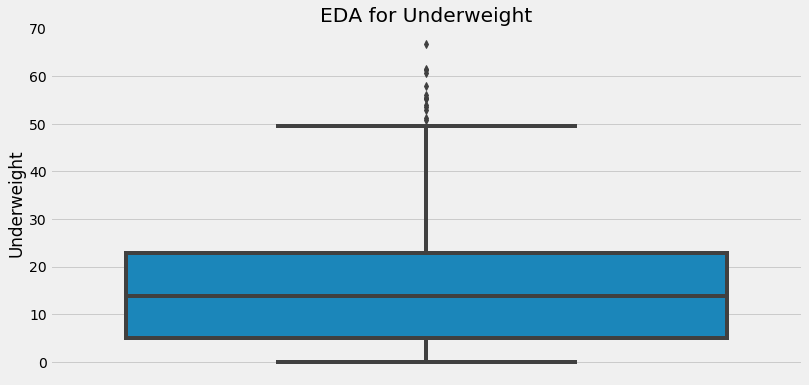

In [24]:
plt.figure(figsize = (12,6))
sns.boxplot(data = Est, y = 'Underweight').set_title("EDA for Underweight");


 **Observation**:

1)Min:0

2)Max:50

3)Outliers: 60-70

4)25%- 5%

5)median 50%- 14% approx

6)75%-20-25%

The graph mentions that on an average  there are Countries with 15% underweight 

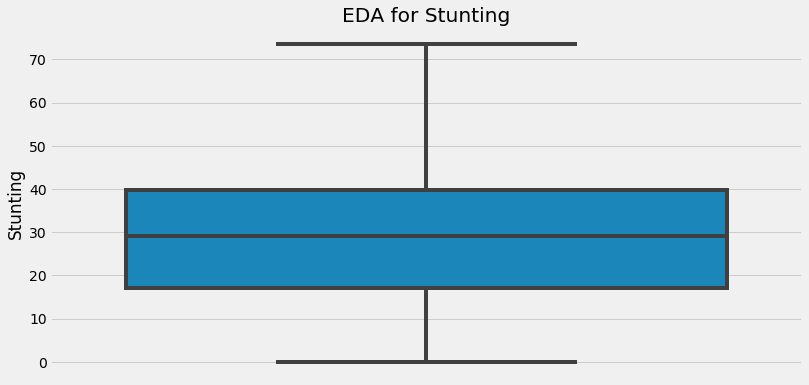

In [25]:
plt.figure(figsize = (12,6))
sns.boxplot(data = Est, y = 'Stunting').set_title("EDA for Stunting");


**Observation**:

1)Min:0

2)Max:>70% approx

3)Outliers: No outliers

4)25%- 16% approx

5)median 50%- 24-28% approx

6)75%-40%

The graph mentions that on an average there are Countries with 20% and above Stunting

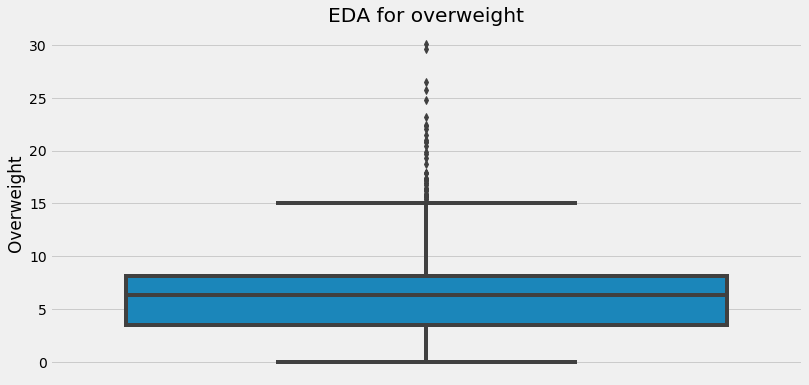

In [26]:
plt.figure(figsize = (12,6))
sns.boxplot(data = Est, y = 'Overweight').set_title("EDA for overweight");


**Observation**:

1)Min:0

2)Max:15% approx

3)Outliers: Yes

4)25%- 3% approx

5)median 50%- 5-10% approx

6)75%-7%

The graph mentions that on an average there are Countries with 5-10% overweight

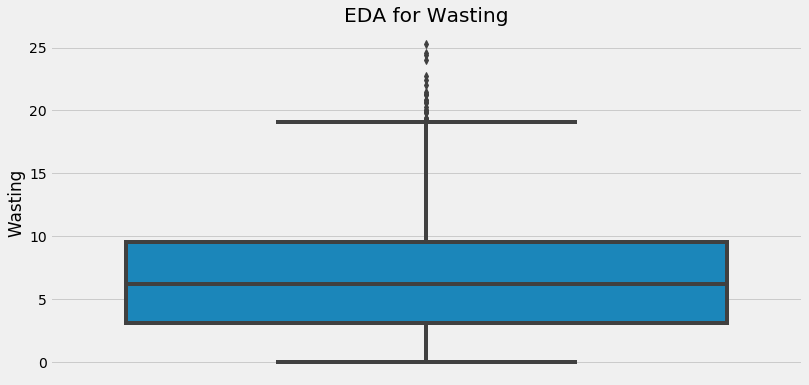

In [27]:
plt.figure(figsize = (12,6))
sns.boxplot(data = Est, y = 'Wasting').set_title("EDA for Wasting");


**Observation**:

1)Min:0

2)Max:20% approx

3)Outliers: Yes

4)25%- 3% approx

5)median 50%- 5-10% approx

6)75%-9%

The graph mentions that on an average there are Countries with 5-10% Wasting

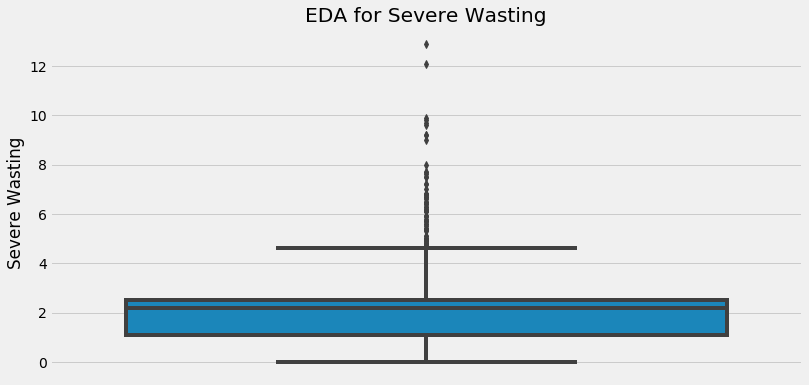

In [28]:
 plt.figure(figsize = (12,6))
sns.boxplot(data = Est, y = 'Severe Wasting').set_title("EDA for Severe Wasting");


Observation:

1)Min:0

2)Max:5% approx

3)Outliers: Yes

4)25%- 1% approx

5)median 50%- 2-3% approx

6)75%-3%

The graph mentions that on an average there are Countries with 2% Wasting

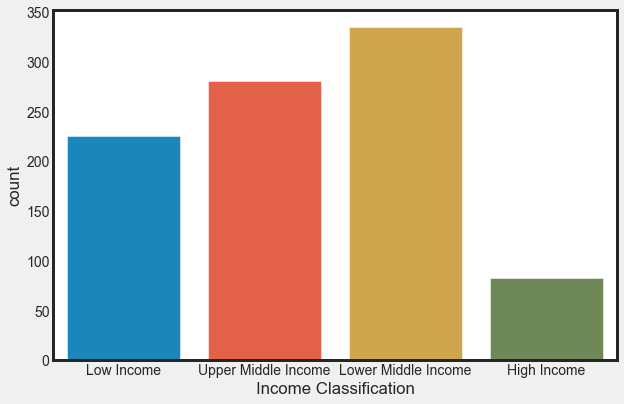

In [29]:
plt.figure(figsize = (9,6))
sns.set_style('white')
sns.countplot(x='Income Classification',data=Est)

**Observation**:
    
This dataset consists of High count in Lower-Middle-Income across all other Income classes

Text(0.5, 1.0, 'DC & LDC')

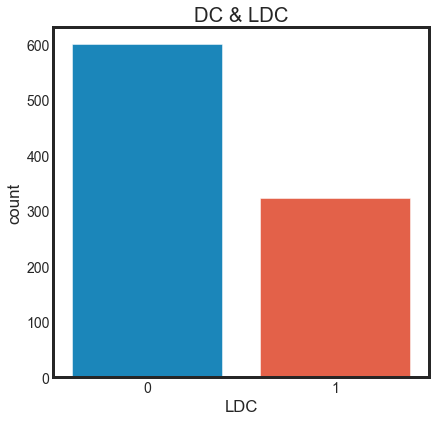

In [30]:
 plt.figure(figsize = (6,6))
sns.set_style('white')
sns.countplot(x='LDC',data=Est).set_title("DC & LDC")

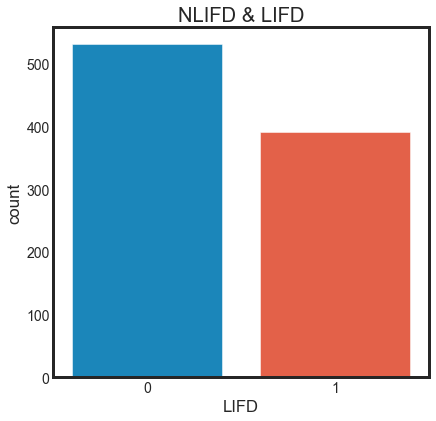

In [31]:
plt.figure(figsize = (6,6))
sns.set_style('white')
sns.countplot(x='LIFD',data=Est).set_title('NLIFD & LIFD');

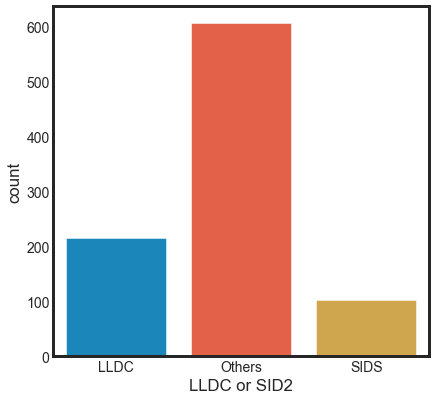

In [32]:
plt.figure(figsize = (6,6))
sns.set_style('white')
sns.countplot(x='LLDC or SID2',data=Est);

In [33]:
df_IL=pd.crosstab(Est['Income Classification'],Est['LDC'])

In [135]:
fig24=df_IL.iplot(kind='bar',title='Income Classification across LDC',yTitle='No of Countries',asFigure=True)
fig24.show()

**Observation**:
    
    Low-Income , Lower-Middle-Income are Least developed Countries Category , wheras Upper-Middle and High Income are Developing Countries which are not no LDC
    

In [35]:
df_IS=pd.crosstab(Est['Income Classification'],Est['LIFD'])

In [136]:
fig25=df_IS.iplot(kind='bar',title='Income Classification across LIFD',yTitle='No of Countries',asFigure=True)
fig25.show()

**Observation**:
    
    Low-Income , Lower-Middle-Income are Low Income food Deficient Category , wheras Upper-Middle and High Income are NLIFD.
    Most number of Countries are LIFD and lie in low, low middle Category

In [37]:
d=pd.crosstab(Est['Income Classification'],Est['LLDC or SID2'])

In [137]:
fig26=d.iplot(kind='bar',title='Income Classification across LLDC or SID2',yTitle='No of Countries',asFigure=True)
fig26.show()

**Observation**:
    
    1) Other Countries Lie in most of The income levels.Lower-Middle-Incomes has highest % of other countries apart Other   Incomes.
    2) Intrestingly Other Countries are part of Upper-Middle-Income.
    3) SIDS are lowest percentage of category across all countries.
    4) Low-Income has more proportion of LLDC and same exsists for Lowe-Middle-Income

# Multivariate Analysis

In [39]:
corr = Est.corr()# pearson

In [40]:
corr

,Year,LDC,LIFD,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
Year,1.00,0.11,0.14,-0.10,-0.14,-0.00,-0.23,-0.18,-0.04
LDC,0.11,1.00,0.63,0.28,0.42,-0.36,0.57,0.56,-0.11
LIFD,0.14,0.63,1.00,0.26,0.41,-0.35,0.52,0.49,0.01
Severe Wasting,-0.10,0.28,0.26,1.00,0.76,0.04,0.38,0.52,0.11
Wasting,-0.14,0.42,0.41,0.76,1.00,-0.25,0.56,0.79,0.18
Overweight,-0.00,-0.36,-0.35,0.04,-0.25,1.00,-0.27,-0.44,-0.08
Stunting,-0.23,0.57,0.52,0.38,0.56,-0.27,1.00,0.83,0.14
Underweight,-0.18,0.56,0.49,0.52,0.79,-0.44,0.83,1.00,0.22
U5 Population ('000s),-0.04,-0.11,0.01,0.11,0.18,-0.08,0.14,0.22,1.00


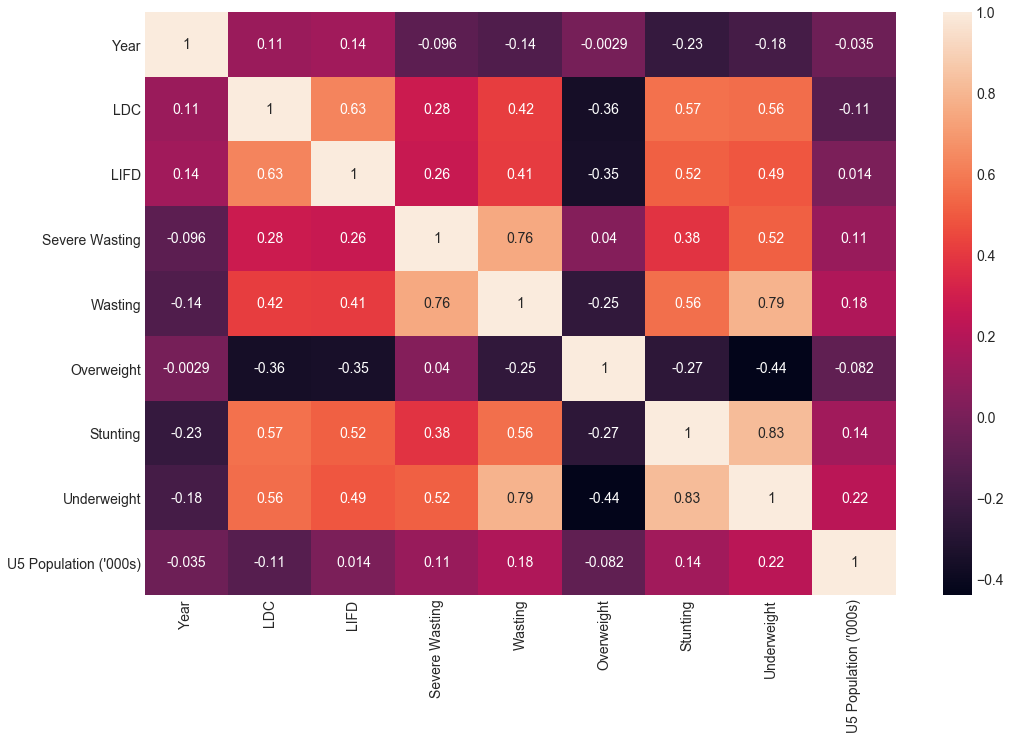

In [41]:
fig = plt.gcf();
fig.set_size_inches(15, 10)
sns.heatmap(corr  , annot = True);

In [42]:
#from scipy import stats
# Filter for correlation value greater than threshold
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
display(sort[(sort > 0.7) & (sort < 1)])

Underweight     Stunting         0.83
Stunting        Underweight      0.83
Wasting         Underweight      0.79
Underweight     Wasting          0.79
Severe Wasting  Wasting          0.76
Wasting         Severe Wasting   0.76
dtype: float64

Observation: As expected stunting, underweight and wasting are highly correlated. heatmap can be represented for discrete values

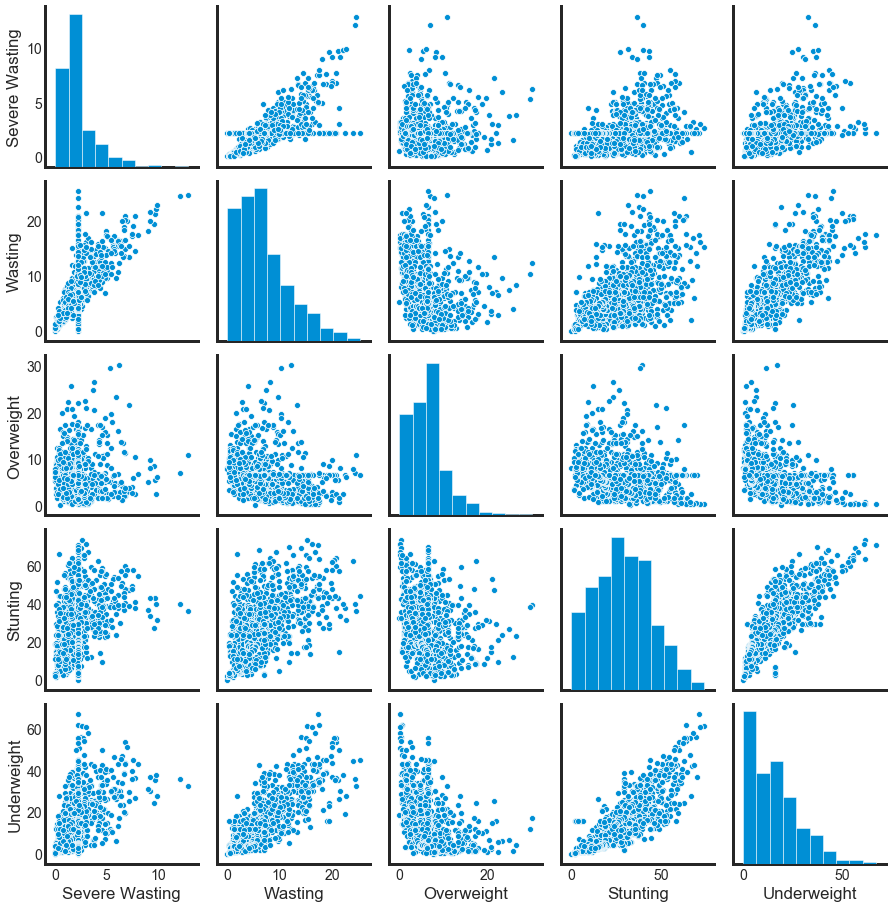

In [43]:
sns.pairplot(Est[['Severe Wasting', 'Wasting', 'Overweight', 'Stunting','Underweight']])

**Observation**:

1)Stunting% and Underweight% are in Linear Relation, they are said to be correlated

2)Wasting and Underweight % are in Linear Relation , they are said to be correlated

# Income Classififcation

In [44]:
Est.groupby(['Income Classification'])[['Severe Wasting','Wasting','Overweight','Stunting','Underweight']].count()

,Severe Wasting,Wasting,Overweight,Stunting,Underweight
Income Classification,,,,,
High Income,83,83,83,83,83
Low Income,225,225,225,225,225
Lower Middle Income,335,335,335,335,335
Upper Middle Income,281,281,281,281,281


More Countries are classified as Lower Middle Income on basis of GDP, GNP

In [45]:
fig1=Est.groupby(['Income Classification'])[['Severe Wasting','Wasting','Overweight','Stunting','Underweight']].mean().iplot(kind='bar',xTitle= 'Income Level' ,yTitle= 'Parameter %',title='Income Classification % across all Parameters',asFigure=True)
fig1.show()

**Observation**: On an average there is more Stunting % and Underweight% across all Incomes which is alarming situation over health status

# Country Wise-Data

In [46]:
Est['Country'].value_counts()

BANGLADESH                            24
VIET NAM                              22
VENEZUELA (BOLIVARIAN REPUBLIC OF)    21
JAMAICA                               20
KUWAIT                                18
                                      ..
MARSHALL ISLANDS                       1
CANADA                                 1
CUBA                                   1
NAURU                                  1
TUVALU                                 1
Name: Country, Length: 152, dtype: int64

In [47]:
country = Est.groupby(['Year'])[['Severe Wasting','Wasting','Overweight','Stunting','Underweight']].mean()

In [48]:
country

,Severe Wasting,Wasting,Overweight,Stunting,Underweight
Year,,,,,
1983,1.20,5.50,3.10,46.00,22.80
1985,2.19,15.10,9.39,33.08,22.77
1986,1.78,7.13,5.94,31.73,20.36
1987,1.90,5.91,4.26,33.87,19.82
1988,1.41,6.01,4.79,34.85,15.53
1989,1.99,7.67,6.61,30.12,16.10
1990,2.52,7.99,5.70,35.46,22.19
1991,2.17,6.59,6.11,31.23,16.57
1992,2.37,7.75,5.37,40.02,22.10


In [49]:
fig2=country[['Stunting','Wasting','Underweight']].iplot(kind='line',title="Change in Parameter% over Years",asFigure=True)
fig2.show()

**Observation**:

**Stunting**:There is a variability in Stunting% across years starting from 1983,88,92,97 2006,10  till 2017 from 40% to 21% it says that Stunting % has decreased over years

**Underweight**: There is a decrease and as well variation of Underweight% over years starting from 1983 from 22.8% to 9.89% till 2017

**Wasting**:Same holds to Wasting but unlikely it is constant over years with slight variation starting in 1983 15.1% to 4.64% in 2017

In [50]:

fig3=country[['Severe Wasting','Overweight']].iplot(kind='line',title="Change in Parameter% over Years",asFigure=True)
fig3.show()

**Observation**:



**Overweight**: Overweight% is alarming over years as observed since it falls and increases rapidly from 30 years starting in 1983 till 2005 and gradually decreases to 5.02% approx from 3% in 1983 which is not the proper parameter measure across Years

**Severe Wasting**:On an average Severe Wasting is constant ranging between 1-3% , with a sudden increase in 1997 to 2.9% but gradully improves over years

**Case-Study**: US stock falls , bond market between countries gets disturbed. Many countries could not repay the loan taken from world bank leading to crisis.

# Country on Year- Basis

In [51]:
Year_df=Est[['Severe Wasting','Wasting','Overweight','Stunting','Underweight','Country','Year']].groupby(['Country','Year']).mean()

In [52]:
Year_df

Severe Wasting  Wasting  Overweight  Stunting  Underweight
Country     Year                                                            
AFGHANISTAN 1997            2.19    18.20        6.50     53.20        44.90
            2004            3.50     8.60        4.60     59.30        32.90
            2013            4.00     9.50        5.30     40.40        24.60
            2018            1.60     5.10        4.10     38.20        19.10
ALBANIA     1997            2.19     8.10        9.50     20.40         7.10
...                          ...      ...         ...       ...          ...
ZIMBABWE    2009            0.50     2.40        3.50     35.10        11.70
            2010            0.80     3.20        5.80     32.20        10.20
            2014            0.70     3.20        3.60     27.60        11.20
            2015            1.10     3.30        5.60     27.10         8.50
            2019            0.30     2.90        2.50     23.50         9.70

[917 rows x 5 columns]

In [53]:
df_count=Est.groupby(['Country'])[['Severe Wasting','Wasting','Overweight','Stunting','Underweight']].count()

In [54]:
df_count.sort_values('Severe Wasting', inplace=True, ascending=False)

In [55]:
df_count

,Severe Wasting,Wasting,Overweight,Stunting,Underweight
Country,,,,,
BANGLADESH,24,24,24,24,24
VIET NAM,22,22,22,22,22
VENEZUELA (BOLIVARIAN REPUBLIC OF),21,21,21,21,21
JAMAICA,20,20,20,20,20
KUWAIT,18,18,18,18,18
...,...,...,...,...,...
TUVALU,1,1,1,1,1
SAINT LUCIA,1,1,1,1,1
JAPAN,1,1,1,1,1


In [56]:
bangladesh = Est[Est['Country'] == 'BANGLADESH']

# Indexing the year
bangladesh = bangladesh.set_index('Year')
# Creating time series
fig4=bangladesh[["Severe Wasting", "Wasting", "Overweight", "Stunting", "Underweight"]].iplot(kind='spread',xTitle= 'Year' ,yTitle= 'Parameter count',title='Bangladesh Parameter of Malnutrition over Years',asFigure=True)
fig4.show()

F:\Anaconda\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



**Observation**- Bangladesh has the worst malnutrition rate from year 1986 and decreased gradually from years due to increase in income and development over years but the main parameters wasting, stunting , underweight are maintaining the treshold which need to be recovered

In [57]:

bangladesh = Est[Est['Country'] == 'BANGLADESH']

# Indexing the year
bangladesh = bangladesh.set_index('Year')


# Creating time series
fig5=bangladesh[["Severe Wasting", "Wasting", "Overweight", "Stunting", "Underweight"]].iplot(kind='box', yTitle= 'Parameter count',title='Bangladesh Parameters of Malnutrition',asFigure=True)
fig5

**Observation**: The box plot depicts that 75% quartile(55.65%) of underweight are also facing Stunting which is a strong correlation observed above in pair-plot. Wasting % is also a parameter in bangladesh which is alarming situation

In [58]:
# Choosing the country
Jamaica = Est[Est['Country'] == 'JAMAICA']

# Indexing the year
Jamaica = Jamaica.set_index('Year')
# Creating time series
fig6=Jamaica[[ "Wasting", "Stunting", "Underweight"]].iplot(kind='spread', yTitle= 'Parameter count',title='Jamaica Parameters of Malnutrition',asFigure=True)
fig6.show()

**Observation**:
Stunting rate continues to be more from initial years starting from 1989 but it has gradually decreased over years whereas Underweight and Wasting are maintaining threshold of Malnutrition. Jamaica needs to improve its stunting level in future  so as to succeed malnutrition

In [59]:
# Choosing the country
Jamaica = Est[Est['Country'] == 'JAMAICA']

# Indexing the year
Jamaica = Jamaica.set_index('Year')
# Creating time series
fig7=Jamaica[["Severe Wasting", "Wasting", "Overweight", "Stunting", "Underweight"]].iplot(kind='box', yTitle= 'Parameter count',title='Jamaica Parameters of Malnutrition',asFigure=True)
fig7

**Observation**:
An Exceptional behaviour is exhibited in the above plot where the overweight is also dominating underweight which depicts that bad is welcoming bad,  as overweight is also not an expected parameter in malnutrition and a country with both overweight and Stunting may not overcome from immunity due to inproper or over intake.

In [60]:
# Choosing the country
Vietnam = Est[Est['Country'] == 'VIET NAM']

# Indexing the year
Vietnam = Vietnam.set_index('Year')
# Creating time series
fig8=Vietnam[[ "Wasting", "Stunting", "Underweight"]].iplot(kind='spread', yTitle= 'Parameter count',title='Vietnam Parameters of Malnutrition over years',asFigure=True)
fig8.show()

**Observation**:

Vietnam has a decrease in all three parameters starting from 1988 and gradually reduced over years till 2017, but it is  actively  greater than threshold of Malnutrition which is expected to be improved in near future

In [61]:
# Choosing the country
Vietnam = Est[Est['Country'] == 'VIET NAM']

# Indexing the year
Vietnam = Vietnam.set_index('Year')
# Creating time series
fig9=Vietnam[[ "Severe Wasting", "Wasting","Overweight", "Stunting", "Underweight"]].iplot(kind='box', yTitle= 'Parameter count',title='Vietnam Parameters of Malnutrition',asFigure=True)
fig9.show()

**Observation**:

There is a skewness observed in Stunting which depicts that Stunting has its range from 40-65% over years which is not recommended value . and as well the relation of underweight and Stunting continues from previous graphs.
Wasting % is decreasing and has a proper median range. Vietnam is expected to be Malnutrition free from 2025 as per case studies from  their country.

In [62]:
# Choosing the country
India= Est[Est['Country'] == 'INDIA']

# Indexing the year
India= India.set_index('Year')
# Creating time series
fig10=India[[ "Overweight", "Stunting", "Underweight"]].iplot(kind='spread', yTitle= 'Parameter count',title='India Parameters of Malnutrition over years',asFigure=True)
fig10.show()

**Observation**:

India accounts to be the most malnourished country as per news and scenario worldwide. The graph depicts the same  with Underweight and Stunting 34%,33% approx each which is 6 times to the threshold value of Malnutrition . Wasting has become constant from initial stages which says , we are in a verge of Health pandemic.

In [63]:
India= Est[Est['Country'] == 'INDIA']

# Indexing the year
India= India.set_index('Year')
# Creating time series
fig11=India[["Severe Wasting", "Wasting", "Overweight", "Stunting", "Underweight"]].iplot(kind='box', yTitle= 'Parameter count',title='India Parameters of Malnutrition',asFigure=True)
fig11.show()

**Observation**:

The box plot clearly depicts that India has a food as well medical facility crisis all the parameters are above the expected range . Underweight and Stunting % increases tehir successful journeys in destroying health status and as well Wasting% which depicts that food is not evenly distributed eventhough agriculture is on top in country. If this Exsistence Prevails we cannot refrain from futher diseases.

**Final Observation**:

1)From the above plots the story is pretty clear that Underweight, stunting are two parameters deciding health status of country

2)Secondly, the countries plotted above are from low Income and Lower-Middle-Income. This throws a light on Income of Country being crucial in Food ,Health Factor

3)Overweight and  Stunting in the same country is very dangerous as it may harm both Economy as well Nutritional status%

# Which country shows highest Severe Wasting percentage?

In [64]:
con_sv = Est.loc[:,['Country','Severe Wasting']]# choosing the columns

In [65]:
con_sv

,Country,Severe Wasting
0,AFGHANISTAN,2.19
1,AFGHANISTAN,3.50
2,AFGHANISTAN,4.00
3,AFGHANISTAN,1.60
4,ALBANIA,2.19
...,...,...
919,ZIMBABWE,0.50
920,ZIMBABWE,0.80
921,ZIMBABWE,0.70
922,ZIMBABWE,1.10


In [66]:
con_sv['percent'] = con_sv.groupby('Country')['Severe Wasting'].transform('max')#creating a column with respect to country as a group which groups the mean of all respective observations into one record
con_sv = con_sv.drop('Severe Wasting',axis=1).drop_duplicates().sort_values('percent', ascending=False).head()#sorting for the first 5 values


In [67]:
con_sv

,Country,percent
733,SOUTH SUDAN,12.90
103,BURKINA FASO,12.10
504,MALI,9.80
221,DJIBOUTI,9.60
499,MALDIVES,9.20


In [68]:
fig12 = px.pie(con_sv, names='Country', values='percent', title='Highest Severe Wasting% Across all Countries')
fig12.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=True)
fig12.show()

**Observation**:

           South-Sudan has a  high Severe-Wasting % of 24.1%, respectively Burkina Faso 22.6%, Mali 18.3%,Djibouti 17.9% , Maldives 17.2% . Observations from other parameters may provide a clear overview 
    

# Which country shows highest  Wasting percentage?

In [69]:
con_ws = Est.loc[:,['Country','Wasting']]
con_ws['percent'] = con_ws.groupby('Country')['Wasting'].transform('max')
con_ws = con_ws.drop('Wasting',axis=1).drop_duplicates().sort_values('percent', ascending=False).head()

fig13 = px.pie(con_ws, names='Country', values='percent',title='Highest Wasting% Across all Countries')
fig13.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label")
fig13.show()

**Observation**:

     Strangely South-sudan and Burkina- Faso continues to be in top-5 highest percentag of Wasting with 20.4%  and 20.2% respectively with Niger 21% as maximum
    

# Which country shows highest Overweight percentage?¶

In [70]:
con_ov = Est.loc[:,['Country','Overweight']]
con_ov['percent'] = con_ov.groupby('Country')['Overweight'].transform('max')
con_ov = con_ov.drop('Overweight',axis=1).drop_duplicates().sort_values('percent', ascending=False).head()

fig14= px.pie(con_ov, names='Country', values='percent', title='Highest Overweight% Across all Countries')
fig14.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label")
fig14.show()

**Observation**:

Albania has the highest overweight% 22.4 on an average with other countries like Libya , Ukraine ,Bosnia , Montenegro . Intrestingly most of them are from Upper-Middle-Income.

# Which country shows highest Stunting percentage?¶

In [71]:
con_st = Est.loc[:,['Country','Stunting']]
con_st['percent'] = con_st.groupby('Country')['Stunting'].transform('max')
con_st = con_st.drop('Stunting',axis=1).drop_duplicates().sort_values('percent', ascending=False).head()

fig15= px.pie(con_st, names='Country', values='percent',title='Highest Stunting% Across all Countries')
fig15.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label")
fig15.show()

**Observation**:

Bangladesh has highest Stunting % on an average of 21.4% and Eritrea , Nepal , Ethipia , Gautemala in the next. To be noted that all these 5 countries are different Income Levels which depicts that Stunting prevails in each class regardless of income
    

# Which country shows highest Underweight percentage?¶

In [72]:
con_u= Est.loc[:,['Country','Underweight']]
con_u['percent'] =con_u.groupby('Country')['Underweight'].transform('max')
con_u = con_u.drop('Underweight',axis=1).drop_duplicates().sort_values('percent', ascending=False).head()

fig16 = px.pie(con_u, names='Country', values='percent', title='Highest Underweight% Across all Countries')
fig16.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label")
fig16.show()

**Observation**:

Bangladesh continues to be on charts with Underweight % on average 24.3% , with India,Korea ,Nepal,Korea , Timor-Leste following on.Intrestingly these countries are prone to malnutrition which will be shown in the obsevations discussed below.

**Final Observation**: 

1) South-Sudan , Burkina Faso , Djibouti , Bangladesh , India , Nepal are frequently seen over the pie plots above and secondly,    all are a subset of both low, lower-middle-Income. 

2) On a final Note  [ Income is directly proportional to Reducing Malnutrition parameter Effect ]


3) Asia and Africa are two continents prone to High Malnutrition-Estimate


# Which country shows highest underweight count? 

In [73]:
df_Und = Est.loc[:,['Country','Underweight','U5 Population (\'000s)']]


In [74]:
df_Und

,Country,Underweight,U5 Population ('000s)
0,AFGHANISTAN,44.90,3838.88
1,AFGHANISTAN,32.90,4789.35
2,AFGHANISTAN,24.60,5444.57
3,AFGHANISTAN,19.10,5601.44
4,ALBANIA,7.10,309.23
...,...,...,...
919,ZIMBABWE,11.70,1938.28
920,ZIMBABWE,10.20,1997.28
921,ZIMBABWE,11.20,2236.18
922,ZIMBABWE,8.50,2258.79


In [75]:
df_Und['underweight_count'] = (df_Und['U5 Population (\'000s)'] * df_Und['Underweight'])/100
df_Und.drop(['Underweight','U5 Population (\'000s)'], axis=1, inplace=True)

In [76]:
df_Und

,Country,underweight_count
0,AFGHANISTAN,1723.66
1,AFGHANISTAN,1575.70
2,AFGHANISTAN,1339.36
3,AFGHANISTAN,1069.88
4,ALBANIA,21.95
...,...,...
919,ZIMBABWE,226.78
920,ZIMBABWE,203.72
921,ZIMBABWE,250.45
922,ZIMBABWE,192.00


In [77]:
df_Und['Totp'] = df_Und.groupby('Country')['underweight_count'].transform('max')
df_Und = df_Und.drop('underweight_count', axis=1).drop_duplicates().sort_values('Totp', ascending=False).head()

In [78]:
df_Und

,Country,Totp
340,INDIA,67280.84
164,CHINA,22316.16
40,BANGLADESH,10276.93
595,NIGERIA,10026.70
349,INDONESIA,8192.86


In [79]:
fig17 = px.pie(df_Und, names='Country', values='Totp',title='Highest Underweight Count ')
fig17.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label")
fig17.show()

**Observation**:

India Accounts to have maximum Underweight count with 57% average , following up are China , Bangladesh , Nigeria , Indonesia with respective Percentages. 

In [80]:
df_Stu = Est.loc[:,['Country','Stunting','U5 Population (\'000s)']]
df_Stu['stunting_count'] = (df_Stu['U5 Population (\'000s)'] * df_Stu['Stunting'])/100
df_Stu.drop(['Stunting','U5 Population (\'000s)'], axis=1, inplace=True)
df_Stu['Totp'] = df_Stu.groupby('Country')['stunting_count'].transform('mean')
df_Stu = df_Stu.drop('stunting_count', axis=1).drop_duplicates().sort_values('Totp', ascending=False).head()

fig18= px.pie(df_Stu, names='Country', values='Totp',  title='Highest Stunting Count')
fig18.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label")
fig18.show()

**Observation**:
    
Indaia again accounts to be maximum Stunting count with 54.6% following up with China , Nigeria, Pakistan , Bangladesh

In [81]:
df_ov = Est.loc[:,['Country','Overweight','U5 Population (\'000s)']]
df_ov['overweight_count'] = (df_ov['U5 Population (\'000s)'] * df_ov['Overweight'])/100
df_ov.drop(['Overweight','U5 Population (\'000s)'], axis=1, inplace=True)
df_ov['Totp'] = df_ov.groupby('Country')['overweight_count'].transform('mean')
df_ov = df_ov.drop('overweight_count', axis=1).drop_duplicates().sort_values('Totp', ascending=False).head()

fig19= px.pie(df_ov, names='Country', values='Totp', title='Highest Overweight Count')
fig19.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label")
fig19.show()

**Observation**:
    
    Intrestingly , India and China Exchanged their positions with China having high Overweight count% 42.3%, following up are India , Indonesia , USA , Nigeria .  USA starts itS innings with this pie chart by accounting 9.23% overweight with
    HIGH-INCOME as its Income Level. The above graphs depicts that U5 population is playing major role in determining count index 

In [82]:
df_wa = Est.loc[:,['Country','Wasting','U5 Population (\'000s)']]
df_wa['wasting_count'] = (df_wa['U5 Population (\'000s)'] * df_wa['Wasting'])/100
df_wa.drop(['Wasting','U5 Population (\'000s)'], axis=1, inplace=True)
df_wa['Totp'] = df_wa.groupby('Country')['wasting_count'].transform('mean')
df_wa = df_wa.drop('wasting_count', axis=1).drop_duplicates().sort_values('Totp', ascending=False).head()

fig20= px.pie(df_wa, names='Country', values='Totp', title='Highest Wasting Count')
fig20.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label")
fig20.show()

**Observation**:

India shows Exceptional behaviour which is not observed in any analysis previously as it accounts highest Wasting Count % of around 66.9% folloeing up are the same countries like China, Nigeria ,Pakistan , Bangladesh.

In [83]:
df_sv = Est.loc[:,['Country','Severe Wasting','U5 Population (\'000s)']]
df_sv['severe_count'] = (df_sv['U5 Population (\'000s)'] * df_sv['Severe Wasting'])/100
df_sv.drop(['Severe Wasting','U5 Population (\'000s)'], axis=1, inplace=True)
df_sv['Totp'] = df_sv.groupby('Country')['severe_count'].transform('mean')
df_sv = df_sv.drop('severe_count', axis=1).drop_duplicates().sort_values('Totp', ascending=False).head()

fig21= px.pie(df_sv, names='Country', values='Totp', title='Highest Severe Wasting Count')
fig21.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label")
fig21.show()

**Observation**:

As discussed previously India also continues its success journey with highest Severe Wasting % too of around 60.8% following up are the same above countries with on replacement of Bangladesh that is Indonesia

**Final Observation**:

1) The above pie plots suggest that U5 population is highest in India , and India child capacity per family accounts to 2 on an average 

2) China, Bangladesh , Indonesia , Pakistan , Nigeria continues to hold high count due to population index range and as well due to higher parameter %


3) China exhibits special behaviour with high overweight including Stunting and Underweight which is not recommended. it has high Overweight % due to the country status income increases but on the otherside it might harm their health status too.

In [84]:
#Observation:The reason behind this exceptional percentage may be due to the population count or any other factor as well.

# LEAST DEVELOPED COUNTRIES Vs DEVELOPING COUNTRIES

In [85]:
df_with_LDC = Est.loc[Est['LDC'] == 1]#choosing rows with LDC 1


In [86]:
df_with_DC = Est.loc[Est['LDC'] == 0]#choosing rows with LDC 0

In [87]:
df_with_LDC.head(5)

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,1997,Low Income,1,1,LLDC,2.19,18.20,6.50,53.20,44.90,3838.88
1,AFGHANISTAN,2004,Low Income,1,1,LLDC,3.50,8.60,4.60,59.30,32.90,4789.35
2,AFGHANISTAN,2013,Low Income,1,1,LLDC,4.00,9.50,5.30,40.40,24.60,5444.57
3,AFGHANISTAN,2018,Low Income,1,1,LLDC,1.60,5.10,4.10,38.20,19.10,5601.44
16,ANGOLA,1996,Lower Middle Income,1,0,Others,1.80,7.70,1.70,61.10,36.20,2749.75


In [88]:
df_with_LDC['Country'].value_counts().head()

BANGLADESH                           24
MALAWI                               15
SENEGAL                              14
BURKINA FASO                         13
UNITED REPUBLIC OF TANZANIA (THE)    11
Name: Country, dtype: int64

In [89]:
len(df_with_LDC['Country'].unique())#total countries under LDC

47

In [90]:
ldc=df_with_LDC[['Severe Wasting','Wasting','Overweight','Stunting','Underweight','Country','Income Classification']].groupby(['Country']).max()

In [91]:
ldc.style.highlight_max(color='#E65236').highlight_min(color='#26BB2D')#finding highest Parameter % across LDC

,Severe Wasting,Wasting,Overweight,Stunting,Underweight,Income Classification
Country,,,,,,
AFGHANISTAN,4.000000,18.200000,6.500000,59.300000,44.900000,Low Income
ANGOLA,4.300000,8.200000,6.434772,61.100000,36.200000,Lower Middle Income
BANGLADESH,6.800000,20.700000,2.600000,73.600000,66.800000,Lower Middle Income
BENIN,4.600000,12.300000,3.100000,39.100000,26.200000,Low Income
BHUTAN,2.191523,5.900000,7.600000,60.900000,34.000000,Lower Middle Income
BURKINA FASO,12.100000,24.400000,7.000000,43.100000,35.900000,Low Income
BURUNDI,2.191523,9.000000,6.434772,64.000000,39.100000,Low Income
CAMBODIA,7.500000,17.100000,6.500000,58.600000,42.600000,Lower Middle Income
CENTRAL AFRICAN REPUBLIC (THE),5.000000,12.100000,10.800000,44.400000,26.100000,Low Income


**Observation**:
    
1) Bangladesh is leading in Stunting and Underweight , but on a positive note with less overweight . 

2) Tuvalu with least Parameter% across all rows which is a positive sign , wheras 10% overweight is to be reduced

3) More Stunting, Underweight [Low Income , Low-Middle-Income]

4) More Overweight[Upper-Middle, Lower-Middle , High Income]

# Malnutrition-Proned (LDC)

In [92]:
ldc.sort_values(by=['Severe Wasting','Stunting','Wasting','Underweight','Overweight'], ascending =False).head(10)

,Severe Wasting,Wasting,Overweight,Stunting,Underweight,Income Classification
Country,,,,,,
SOUTH SUDAN,12.90,24.60,10.90,36.20,32.50,Low Income
BURKINA FASO,12.10,24.40,7.00,43.10,35.90,Low Income
MALI,9.80,22.00,4.60,42.50,37.70,Low Income
DJIBOUTI,9.60,21.50,8.40,33.50,29.90,Lower Middle Income
MAURITANIA,8.00,19.10,6.80,54.60,43.10,Lower Middle Income
TIMOR-LESTE,7.60,21.30,6.43,57.50,49.50,Lower Middle Income
CAMBODIA,7.50,17.10,6.50,58.60,42.60,Lower Middle Income
LAO PEOPLE'S DEMOCRATIC REP. (THE),7.50,17.50,6.43,53.60,39.80,Lower Middle Income
COMOROS (THE),7.20,13.30,21.50,46.90,25.10,Lower Middle Income


**Observation**:

As dicussed above the countries which are low , Low-Middle-Income are also Least Developed Countries

South-Sudan , Burkina-Faso, Mali, Djibouti, Bangladesh with high parameter% and count% are under Malnutrition Proned as discussed in pie charts above.

# Less Malnutrition- Proned (LDC)

In [93]:
ldc.sort_values(by=['Severe Wasting','Stunting','Wasting','Underweight','Overweight']).head(10)

,Severe Wasting,Wasting,Overweight,Stunting,Underweight,Income Classification
Country,,,,,,
TUVALU,0.90,3.30,6.30,10.00,1.60,Upper Middle Income
VANUATU,2.19,6.80,6.43,28.90,11.70,Lower Middle Income
KIRIBATI,2.19,12.60,15.90,34.40,15.10,Lower Middle Income
BHUTAN,2.19,5.90,7.60,60.90,34.00,Lower Middle Income
BURUNDI,2.19,9.00,6.43,64.00,39.10,Low Income
UGANDA,2.20,6.20,5.80,47.70,20.80,Low Income
ZAMBIA,2.50,6.96,14.00,59.20,23.20,Lower Middle Income
UNITED REPUBLIC OF TANZANIA (THE),2.90,8.50,6.43,49.90,26.80,Low Income
SENEGAL,3.00,10.00,6.43,34.40,20.40,Lower Middle Income


**Observation**:

TUVALU has least malnutrition rate but intrestingly Overweight and Stunting are ore than 5% which need to be reduced in near future    

In [94]:
df_with_DC.head(5)

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
4,ALBANIA,1997,Upper Middle Income,0,0,Others,2.19,8.10,9.50,20.40,7.10,309.23
5,ALBANIA,2000,Upper Middle Income,0,0,Others,6.20,12.20,30.10,39.20,17.00,279.83
6,ALBANIA,2005,Upper Middle Income,0,0,Others,3.70,7.30,24.80,26.70,6.60,219.41
7,ALBANIA,2009,Upper Middle Income,0,0,Others,5.90,9.60,23.20,23.20,6.30,179.31
8,ALBANIA,2017,Upper Middle Income,0,0,Others,0.50,1.60,16.40,11.30,1.50,176.52


In [95]:
df_with_DC['Country'].value_counts()

VIET NAM                              22
VENEZUELA (BOLIVARIAN REPUBLIC OF)    21
JAMAICA                               20
KUWAIT                                18
INDONESIA                             16
                                      ..
SAINT LUCIA                            1
CANADA                                 1
SINGAPORE                              1
UKRAINE                                1
NAURU                                  1
Name: Country, Length: 105, dtype: int64

In [96]:
len(df_with_DC['Country'].unique())

105

In [97]:
Dc=df_with_DC[['Severe Wasting','Wasting','Overweight','Stunting','Underweight','Country','Income Classification']].groupby(['Country']).max()

In [98]:
Dc.style.highlight_max(color='#E65236').highlight_min(color='#26BB2D')

,Severe Wasting,Wasting,Overweight,Stunting,Underweight,Income Classification
Country,,,,,,
ALBANIA,6.200000,12.200000,30.100000,39.200000,17.000000,Upper Middle Income
ALGERIA,5.000000,9.600000,15.100000,24.000000,11.300000,Upper Middle Income
ARGENTINA,2.191523,4.200000,13.500000,16.900000,4.700000,Upper Middle Income
ARMENIA,2.600000,5.400000,16.500000,20.900000,5.300000,Upper Middle Income
AUSTRALIA,2.191523,6.955644,22.000000,29.063134,15.841242,High Income
AZERBAIJAN,4.100000,9.000000,14.100000,28.000000,14.000000,Upper Middle Income
BAHRAIN,2.191523,6.800000,7.500000,13.900000,7.600000,High Income
BARBADOS,2.000000,6.800000,12.200000,7.700000,3.500000,High Income
BELARUS,0.600000,2.200000,9.700000,4.500000,1.300000,Upper Middle Income


**Observation**:

1)Albania has highest  overweight % , with Income Level Upper-Middle-Income

2) Guatemala exhibits higher Stunting % , being Upper-Middle-Income which says that income may be a factor but not basis for parameter %

3) Republic of Korea exhibits threshold behaviour with least severe Wasting% and Underweight% which is a good sign


#  Malnutrition- Proned (DC)

In [99]:
Dc.sort_values(by=['Severe Wasting','Stunting','Wasting','Underweight','Overweight'], ascending =False).head(10)

,Severe Wasting,Wasting,Overweight,Stunting,Underweight,Income Classification
Country,,,,,,
MALDIVES,9.20,19.90,9.80,43.00,39.00,Upper Middle Income
NIGERIA,9.00,20.60,13.30,48.70,35.10,Lower Middle Income
INDIA,7.70,20.80,6.43,62.70,55.50,Lower Middle Income
INDONESIA,6.80,14.90,12.30,48.10,35.90,Lower Middle Income
PAPUA NEW GUINEA,6.40,14.10,13.70,49.50,27.80,Lower Middle Income
ALBANIA,6.20,12.20,30.10,39.20,17.00,Upper Middle Income
UZBEKISTAN,6.10,10.70,15.90,39.50,13.30,Lower Middle Income
PAKISTAN,5.80,24.00,7.80,62.50,44.40,Lower Middle Income
SYRIAN ARAB REPUBLIC (THE),5.50,11.50,19.70,32.80,11.50,Low Income


# Less Malnutrition- Proned (DC)

In [100]:
Dc.sort_values(by=['Severe Wasting','Stunting','Wasting','Underweight','Overweight']).head(10)

,Severe Wasting,Wasting,Overweight,Stunting,Underweight,Income Classification
Country,,,,,,
REPUBLIC OF KOREA (THE),0.20,1.20,7.30,2.50,0.90,High Income
JAPAN,0.20,2.30,1.50,7.10,3.40,High Income
NAURU,0.20,1.00,2.80,24.00,4.80,Upper Middle Income
BRUNEI DARUSSALAM,0.40,2.90,8.30,19.70,9.60,High Income
PANAMA,0.40,1.60,11.10,23.70,5.30,High Income
SINGAPORE,0.50,3.60,2.60,4.40,3.30,High Income
EL SALVADOR,0.50,2.20,6.40,36.70,11.10,Lower Middle Income
BELARUS,0.60,2.20,9.70,4.50,1.30,Upper Middle Income
SAINT LUCIA,0.70,3.70,6.30,2.50,2.80,Upper Middle Income


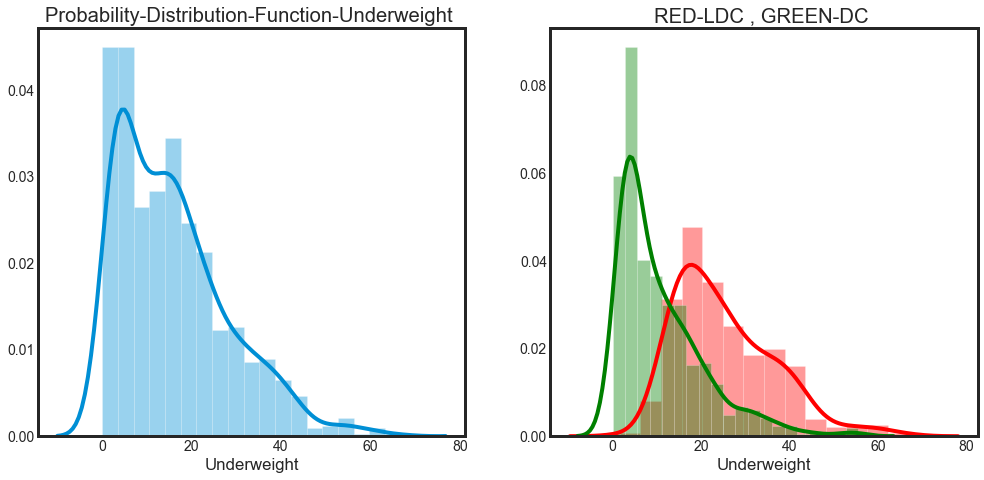

In [101]:
f,(ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7))
sns.distplot(Est['Underweight'], ax=ax1).set_title('Probability-Distribution-Function-Underweight ');
sns.distplot( df_with_LDC['Underweight'],ax = ax2 , color = 'r').set_title('RED-LDC , GREEN-DC ');
sns.distplot( df_with_DC['Underweight'],ax = ax2, color = 'g');

**Observation**:
Least developed country(red) has less no of underweights and no in developed countries are way More considerably .

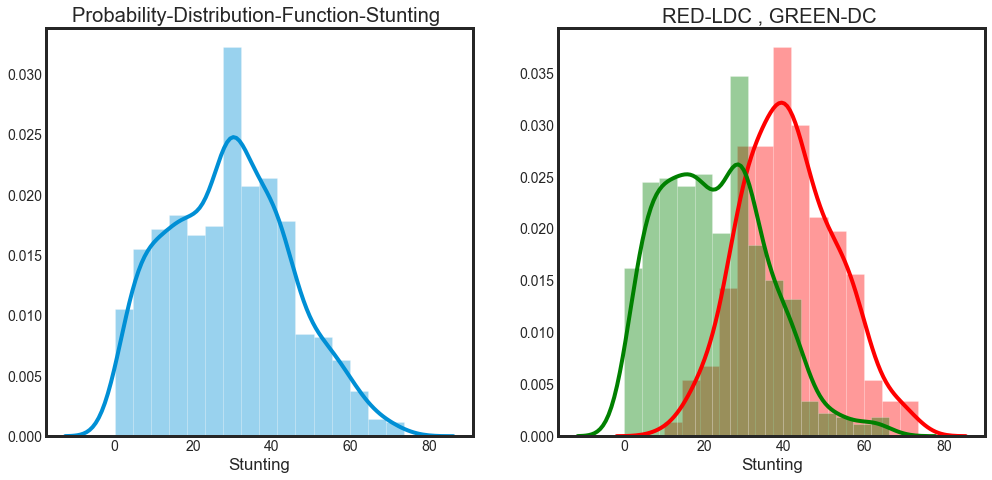

In [102]:
f,(ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7))

sns.distplot(Est['Stunting'], ax=ax1).set_title('Probability-Distribution-Function-Stunting ');
sns.distplot( df_with_LDC['Stunting'],ax = ax2 , color = 'r').set_title('RED-LDC , GREEN-DC ');
sns.distplot( df_with_DC['Stunting'],ax = ax2, color = 'g')


**Observation**:
 developed country(green) has has more no of Stunting and number in  Least developed countries are way lesser considerably .

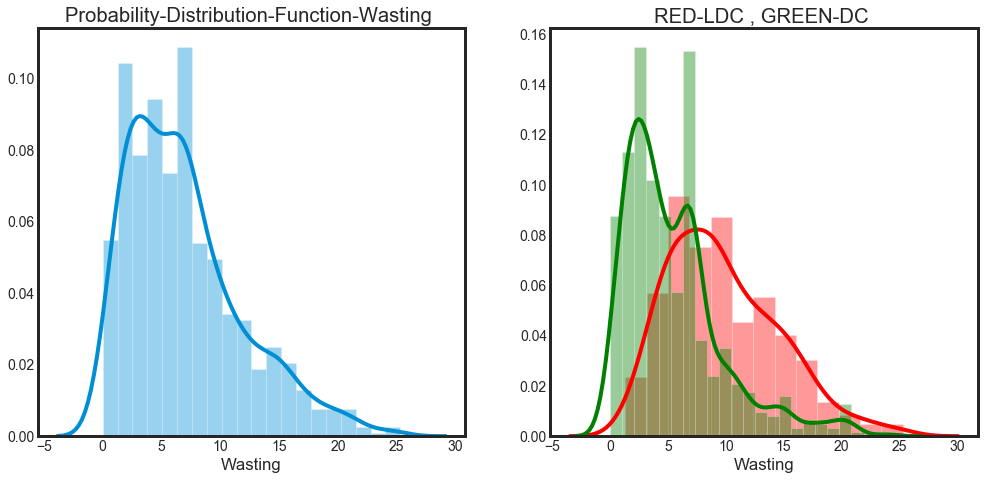

In [103]:
f,(ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7))

sns.distplot(Est['Wasting'], ax=ax1).set_title('Probability-Distribution-Function-Wasting ');
sns.distplot( df_with_LDC['Wasting'],ax = ax2 , color = 'r').set_title('RED-LDC , GREEN-DC ');
sns.distplot( df_with_DC['Wasting'],ax = ax2, color = 'g')

**Observation**:
Least developed country(green) has has more no of underweights and no in developed countries are way lesser considerably .

# Low Income Food Deficient Countries 

In [104]:
df_with_LIFD = Est.loc[Est['LIFD'] == 1]
df_with_NLIFD = Est.loc[Est['LIFD'] == 0]

In [105]:
df_with_LIFD.head()

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,1997,Low Income,1,1,LLDC,2.19,18.20,6.50,53.20,44.90,3838.88
1,AFGHANISTAN,2004,Low Income,1,1,LLDC,3.50,8.60,4.60,59.30,32.90,4789.35
2,AFGHANISTAN,2013,Low Income,1,1,LLDC,4.00,9.50,5.30,40.40,24.60,5444.57
3,AFGHANISTAN,2018,Low Income,1,1,LLDC,1.60,5.10,4.10,38.20,19.10,5601.44
40,BANGLADESH,1986,Lower Middle Income,1,1,Others,2.19,17.30,0.20,70.90,66.80,15384.62


In [106]:
len(df_with_LIFD['Country'].unique())

51

In [107]:
Lifd=df_with_LIFD[['Severe Wasting','Wasting','Overweight','Stunting','Underweight','Country','Income Classification']].groupby(['Country']).max()

In [108]:
Lifd.style.highlight_max(color='#E65236').highlight_min(color='#26BB2D')

,Severe Wasting,Wasting,Overweight,Stunting,Underweight,Income Classification
Country,,,,,,
AFGHANISTAN,4.000000,18.200000,6.500000,59.300000,44.900000,Low Income
BANGLADESH,6.800000,20.700000,2.600000,73.600000,66.800000,Lower Middle Income
BENIN,4.600000,12.300000,3.100000,39.100000,26.200000,Low Income
BURKINA FASO,12.100000,24.400000,7.000000,43.100000,35.900000,Low Income
BURUNDI,2.191523,9.000000,6.434772,64.000000,39.100000,Low Income
CAMEROON,2.600000,7.600000,11.000000,38.200000,17.300000,Lower Middle Income
CENTRAL AFRICAN REPUBLIC (THE),5.000000,12.100000,10.800000,44.400000,26.100000,Low Income
CHAD,6.500000,16.500000,4.200000,44.500000,34.300000,Low Income
COMOROS (THE),7.200000,13.300000,21.500000,46.900000,25.100000,Lower Middle Income


In [109]:
Lifd.sort_values(by=['Severe Wasting','Stunting','Wasting','Underweight','Overweight'], ascending =False).head(10)

,Severe Wasting,Wasting,Overweight,Stunting,Underweight,Income Classification
Country,,,,,,
SOUTH SUDAN,12.90,24.60,10.90,36.20,32.50,Low Income
BURKINA FASO,12.10,24.40,7.00,43.10,35.90,Low Income
MALI,9.80,22.00,4.60,42.50,37.70,Low Income
DJIBOUTI,9.60,21.50,8.40,33.50,29.90,Lower Middle Income
MAURITANIA,8.00,19.10,6.80,54.60,43.10,Lower Middle Income
INDIA,7.70,20.80,6.43,62.70,55.50,Lower Middle Income
COMOROS (THE),7.20,13.30,21.50,46.90,25.10,Lower Middle Income
BANGLADESH,6.80,20.70,2.60,73.60,66.80,Lower Middle Income
YEMEN,6.80,17.40,8.10,57.30,45.30,Low Income


In [110]:
df_with_NLIFD.head()

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
4,ALBANIA,1997,Upper Middle Income,0,0,Others,2.19,8.10,9.50,20.40,7.10,309.23
5,ALBANIA,2000,Upper Middle Income,0,0,Others,6.20,12.20,30.10,39.20,17.00,279.83
6,ALBANIA,2005,Upper Middle Income,0,0,Others,3.70,7.30,24.80,26.70,6.60,219.41
7,ALBANIA,2009,Upper Middle Income,0,0,Others,5.90,9.60,23.20,23.20,6.30,179.31
8,ALBANIA,2017,Upper Middle Income,0,0,Others,0.50,1.60,16.40,11.30,1.50,176.52


In [111]:
NLifd=df_with_NLIFD[['Severe Wasting','Wasting','Overweight','Stunting','Underweight','Country','Income Classification']].groupby(['Country']).max()

In [112]:
NLifd.sort_values(by=['Severe Wasting','Stunting','Wasting','Underweight','Overweight'], ascending =False).head(10)

,Severe Wasting,Wasting,Overweight,Stunting,Underweight,Income Classification
Country,,,,,,
MALDIVES,9.20,19.90,9.80,43.00,39.00,Upper Middle Income
NIGERIA,9.00,20.60,13.30,48.70,35.10,Lower Middle Income
TIMOR-LESTE,7.60,21.30,6.43,57.50,49.50,Lower Middle Income
CAMBODIA,7.50,17.10,6.50,58.60,42.60,Lower Middle Income
LAO PEOPLE'S DEMOCRATIC REP. (THE),7.50,17.50,6.43,53.60,39.80,Lower Middle Income
INDONESIA,6.80,14.90,12.30,48.10,35.90,Lower Middle Income
PAPUA NEW GUINEA,6.40,14.10,13.70,49.50,27.80,Lower Middle Income
ALBANIA,6.20,12.20,30.10,39.20,17.00,Upper Middle Income
PAKISTAN,5.80,24.00,7.80,62.50,44.40,Lower Middle Income


In [113]:
df = Est.loc[:,['LIFD','Underweight']]
df['max'] = df.groupby('LIFD')['Underweight'].transform('mean')
df = df.drop('Underweight', axis=1).drop_duplicates()

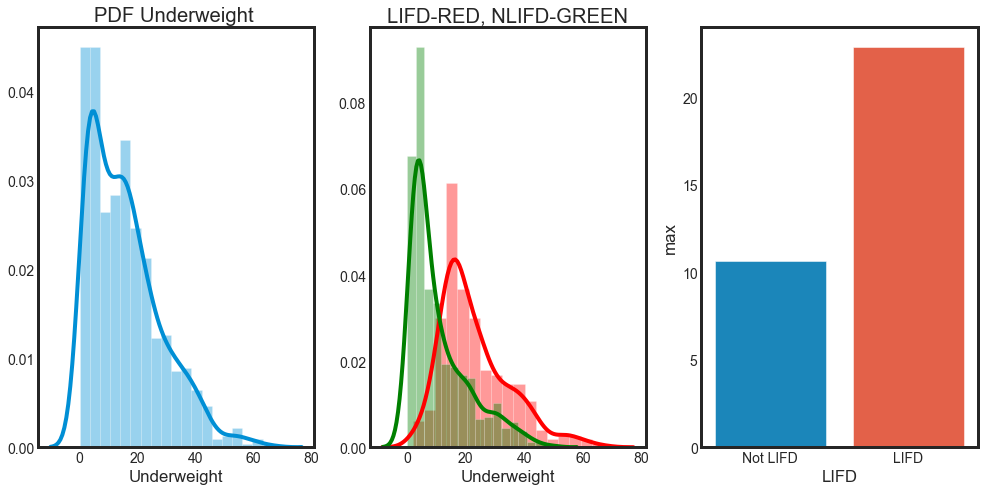

In [114]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
sns.distplot(Est['Underweight'], ax=ax1).set_title('PDF Underweight ');
sns.distplot( df_with_LIFD['Underweight'],ax = ax2 , color = 'r').set_title('LIFD-RED, NLIFD-GREEN');
sns.distplot( df_with_NLIFD['Underweight'],ax = ax2, color = 'g')
fig = sns.barplot(data=df, x='LIFD', y='max')
fig.set(xticklabels = ['Not LIFD', 'LIFD'])
plt.show()

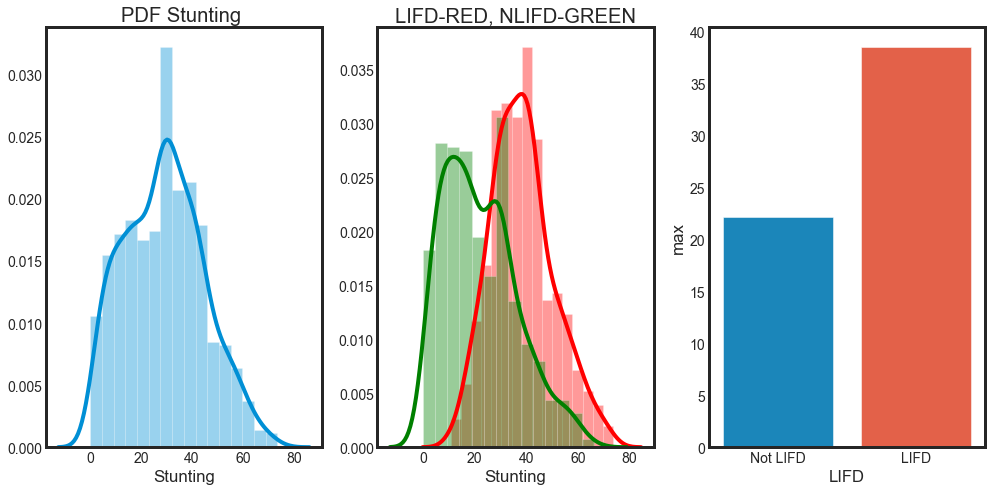

In [115]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
df_with_LIFD = (Est.loc[Est['LIFD'] == 1])
df_with_NLIFD = Est.loc[Est['LIFD'] == 0]

sns.distplot(Est['Stunting'], ax=ax1).set_title('PDF Stunting ');
sns.distplot( df_with_LIFD['Stunting'],ax = ax2 , color = 'r').set_title('LIFD-RED, NLIFD-GREEN');
sns.distplot( df_with_NLIFD['Stunting'],ax = ax2, color = 'g')

df = Est.loc[:,['LIFD','Stunting']]
df['max'] = df.groupby('LIFD')['Stunting'].transform('mean')
df = df.drop('Stunting', axis=1).drop_duplicates()

fig = sns.barplot(data=df, x='LIFD', y='max')
fig.set(xticklabels = ['Not LIFD', 'LIFD'])
plt.show()

# Both LIFD & LDC  (Recent data)¶

In [131]:
df = Est.loc[Est.Year >=2018]
temp = df.loc[(df.LDC == 1) & (df.LIFD ==1) ]

# 5 contries in which Stunting percentage is highest
severe_wasting_df=temp.sort_values(by='Severe Wasting', ascending =False).head(5)
wasting_df =temp.sort_values(by='Wasting', ascending =False).head(5)
stunting_df = temp.sort_values(by='Stunting', ascending =False).head(5)
underweight_df =temp.sort_values(by='Underweight', ascending =False).head(5)
overweight_df=temp.sort_values(by='Overweight', ascending =False).head(5)

In [132]:
temp

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
3,AFGHANISTAN,2018,Low Income,1,1,LLDC,1.60,5.10,4.10,38.20,19.10,5601.44
63,BANGLADESH,2018,Lower Middle Income,1,1,Others,1.30,8.40,2.20,30.80,21.90,14516.61
73,BENIN,2018,Low Income,1,1,Others,1.10,5.00,1.90,32.20,16.80,1841.61
115,BURKINA FASO,2018,Low Income,1,1,LLDC,1.70,8.40,1.00,24.90,17.70,3344.62
121,BURUNDI,2019,Low Income,1,1,LLDC,1.10,5.10,6.43,54.20,27.20,2018.70
143,CENTRAL AFRICAN REPUBLIC (THE),2018,Low Income,1,1,LLDC,2.19,6.60,6.43,40.80,20.80,727.43
275,ETHIOPIA,2019,Low Income,1,1,LLDC,1.20,7.20,2.10,36.80,21.10,16560.83
286,GAMBIA (THE),2018,Low Income,1,1,Others,1.00,6.20,1.20,19.00,13.90,392.90
287,GAMBIA (THE),2018,Low Income,1,1,Others,1.30,6.00,2.50,13.60,10.30,392.90
316,GUINEA,2018,Low Income,1,1,Others,3.60,9.20,5.60,30.30,16.30,2019.75


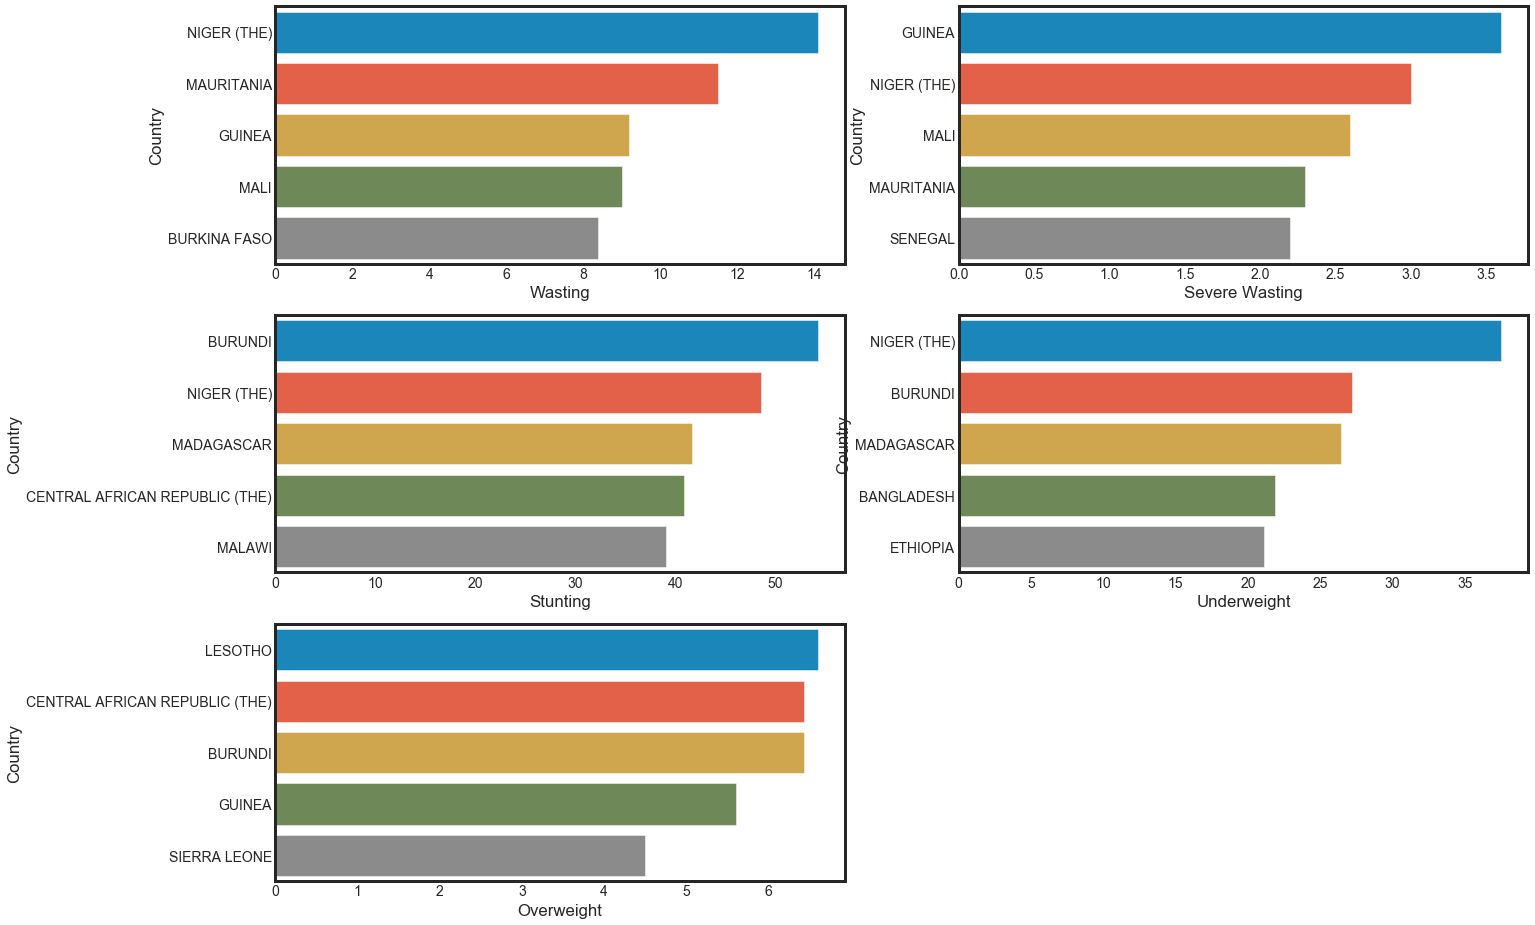

In [133]:
fig =plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(3,2,1)
ax2 =fig.add_subplot(3,2,2)
ax3 =fig.add_subplot(3,2,3)
ax4 =fig.add_subplot(3,2,4)
ax5 =fig.add_subplot(3,2,5)


sns.barplot(data =severe_wasting_df,ax=ax2, y='Country', x='Severe Wasting', orient='h')
sns.barplot(data =wasting_df,ax=ax1, y='Country', x='Wasting', orient='h')
sns.barplot(data =stunting_df,ax=ax3, y='Country', x='Stunting', orient='h')
sns.barplot(data =underweight_df,ax=ax4, y='Country', x='Underweight', orient='h')
sns.barplot(data =overweight_df,ax=ax5, y='Country', x='Overweight', orient='h')
plt.show()

**Observation**:(Top-3) LDC,LIFD

1) Guniea,Niger,Mali has high severe wasting%

2) Niger, Mauritania, Guniea has high Wasting%

3) Burundi,Niger, Madgascar has high Stunting% and as well Underweight

4) Lesotho , Central African Republic , Burundi also registers high overweight


**Final Observation**:

1)Niger, Mauritania, Guniea, Burundi, Madgascar,Central African Republic are part of all parameters leading to Malnutrition Effect as they are both Least developed , Low Income Food Deficient

2)Burundi exhibits Stunting, Underweight , Overweight in top-3 which is not acceptable Parameter% across countries

3)Niger is more Malnutrition Effected across all LDC & LIFD with Low-Income

# Both NLIFD & DC

In [119]:
df2 = Est.loc[Est.Year >=2018]
temp1= df2.loc[(df2.LDC == 0) & (df2.LIFD ==0)]

# 5 contries in which Stunting percentage is highest
severe_wasting_df1=temp1.sort_values(by='Severe Wasting', ascending =False).head(5)
wasting_df1 =temp1.sort_values(by='Wasting', ascending =False).head(5)
stunting_df1 = temp1.sort_values(by='Stunting', ascending =False).head(5)
underweight_df1 =temp1.sort_values(by='Underweight', ascending =False).head(5)
overweight_df1=temp1.sort_values(by='Overweight', ascending =False).head(5)

In [120]:
temp1

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
22,ARGENTINA,2019,Upper Middle Income,0,0,Others,2.19,1.60,10.00,7.90,1.70,3741.88
364,INDONESIA,2018,Lower Middle Income,0,0,Others,3.50,10.20,8.00,30.50,17.70,24350.30
375,IRAQ,2018,Upper Middle Income,0,0,Others,0.90,3.00,6.10,12.60,3.90,5404.40
540,MONGOLIA,2018,Lower Middle Income,0,0,LLDC,0.30,0.90,10.50,9.40,1.80,380.27
605,NIGERIA,2018,Lower Middle Income,0,0,Others,1.80,6.80,2.10,36.80,21.80,32917.19
622,PAKISTAN,2018,Lower Middle Income,0,0,Others,2.40,7.10,2.50,37.60,23.10,27290.92
647,PERU,2018,Upper Middle Income,0,0,Others,0.10,0.50,8.60,12.20,2.60,2756.62
658,PHILIPPINES (THE),2018,Lower Middle Income,0,0,Others,2.19,5.60,4.00,30.30,19.10,11035.27
802,TUNISIA,2018,Lower Middle Income,0,0,Others,0.90,2.10,17.20,8.40,1.60,1035.91
809,TURKEY,2018,Upper Middle Income,0,0,Others,2.19,1.70,8.10,6.00,1.50,6749.27


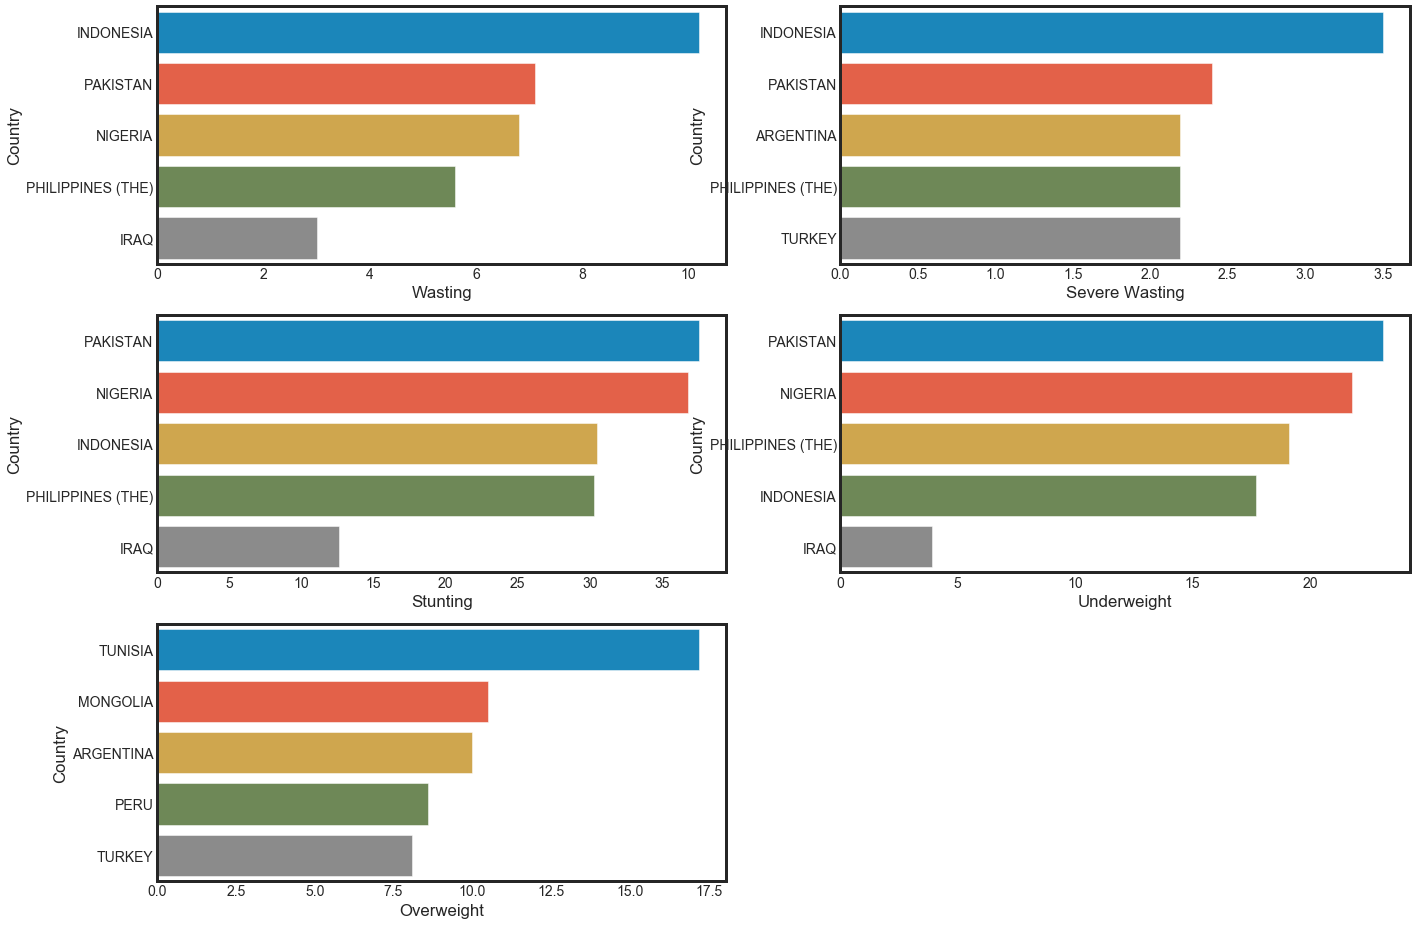

In [121]:
fig =plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(3,2,1)
ax2 =fig.add_subplot(3,2,2)
ax3 =fig.add_subplot(3,2,3)
ax4 =fig.add_subplot(3,2,4)
ax5 =fig.add_subplot(3,2,5)


sns.barplot(data =severe_wasting_df1,ax=ax2, y='Country', x='Severe Wasting')
sns.barplot(data =wasting_df1,ax=ax1, y='Country', x='Wasting')
sns.barplot(data =stunting_df1,ax=ax3, y='Country', x='Stunting')
sns.barplot(data =underweight_df1,ax=ax4, y='Country', x='Underweight')
sns.barplot(data =overweight_df1,ax=ax5, y='Country', x='Overweight')
plt.show()

**Observation**:(Top-3) DC,NLIFD

1) Indonesia,Pakistan,Nigeria, Philippines has high  wasting%

2) Indonesia,Pakistan,Argentina,Philippines has high severe Wasting%

3) Pakistan, Nigeria, Indonesia, Philippines,Iraq has high Stunting% and as well Underweight in top-4

4) Tunisia,Mongolia,Argentina  registers high overweight%,


**Final Observation**:

1)  Indonesia,Pakistan 10%,7% approximately are having more Severe Wasting,Wasting, Underweight, Stunting % which is not        accepable parameter% according to the threshold 5%

2)   Nigeria, Philippines has more stunting, Underweight % which are correlated and need to be reduced les  to treshold

3) Iraq exhibits more stunting% less Underweight% which is half of Stunting% . Iraq health status totally depends on its Underweight which may lead to stunting

# Landlocked Developing Countries vs Small Island Developing states vs Others

In [122]:
Others= Est.loc[Est['LLDC or SID2'] == 'Others']
SID = Est.loc[Est['LLDC or SID2'] == 'SIDS']
LLDC=Est.loc[Est['LLDC or SID2'] == 'LLDC']

In [123]:
fig23=Est.groupby(['LLDC or SID2'])[['Severe Wasting','Wasting','Stunting','Overweight','Underweight']].mean().iplot(kind='bar', yTitle= 'Parameter %',title='LLDC or SIDS or Others %',asFigure=True)
fig23.show()

 **Observation**:
 Across LLDC , SIDS, Others
 
 1) LLDC HAS HIGH Stunting % following up are Other Countries and SIDS
 
 2) LLDC has High Underweight Compared to other parameters too which clearly depicts that underweight, stunting across all LDC,LIFD,INCOME,LLDC,SIDS is major that finally tells us that there is population which is not getting proper Nutrition and leading to Stunting finally.
    
3) Overweight and Stunting is common across all the parameters but 1-2% above threshold(5%)

4) Less Severe Wasting % is a good sign over LLDC, SID, Others and might reduce further

In [124]:
df3 = Est.loc[Est.Year >=2018]
temp3= df3.loc[(df3.LDC == 0) & (df3.LIFD ==0) &(df3['LLDC or SID2']=='Others')]

# 5 contries in which Stunting percentage is highest
severe_wasting_df3=temp3.sort_values(by='Severe Wasting', ascending =False).head(5)

wasting_df3 =temp3.sort_values(by='Wasting', ascending =False).head(5)
stunting_df3 = temp3.sort_values(by='Stunting', ascending =False).head(5)
underweight_df3 =temp3.sort_values(by='Underweight', ascending =False).head(5)
overweight_df3=temp3.sort_values(by='Overweight', ascending =False).head(5)

In [125]:
temp3

,Country,Year,Income Classification,LDC,LIFD,LLDC or SID2,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
22,ARGENTINA,2019,Upper Middle Income,0,0,Others,2.19,1.60,10.00,7.90,1.70,3741.88
364,INDONESIA,2018,Lower Middle Income,0,0,Others,3.50,10.20,8.00,30.50,17.70,24350.30
375,IRAQ,2018,Upper Middle Income,0,0,Others,0.90,3.00,6.10,12.60,3.90,5404.40
605,NIGERIA,2018,Lower Middle Income,0,0,Others,1.80,6.80,2.10,36.80,21.80,32917.19
622,PAKISTAN,2018,Lower Middle Income,0,0,Others,2.40,7.10,2.50,37.60,23.10,27290.92
647,PERU,2018,Upper Middle Income,0,0,Others,0.10,0.50,8.60,12.20,2.60,2756.62
658,PHILIPPINES (THE),2018,Lower Middle Income,0,0,Others,2.19,5.60,4.00,30.30,19.10,11035.27
802,TUNISIA,2018,Lower Middle Income,0,0,Others,0.90,2.10,17.20,8.40,1.60,1035.91
809,TURKEY,2018,Upper Middle Income,0,0,Others,2.19,1.70,8.10,6.00,1.50,6749.27


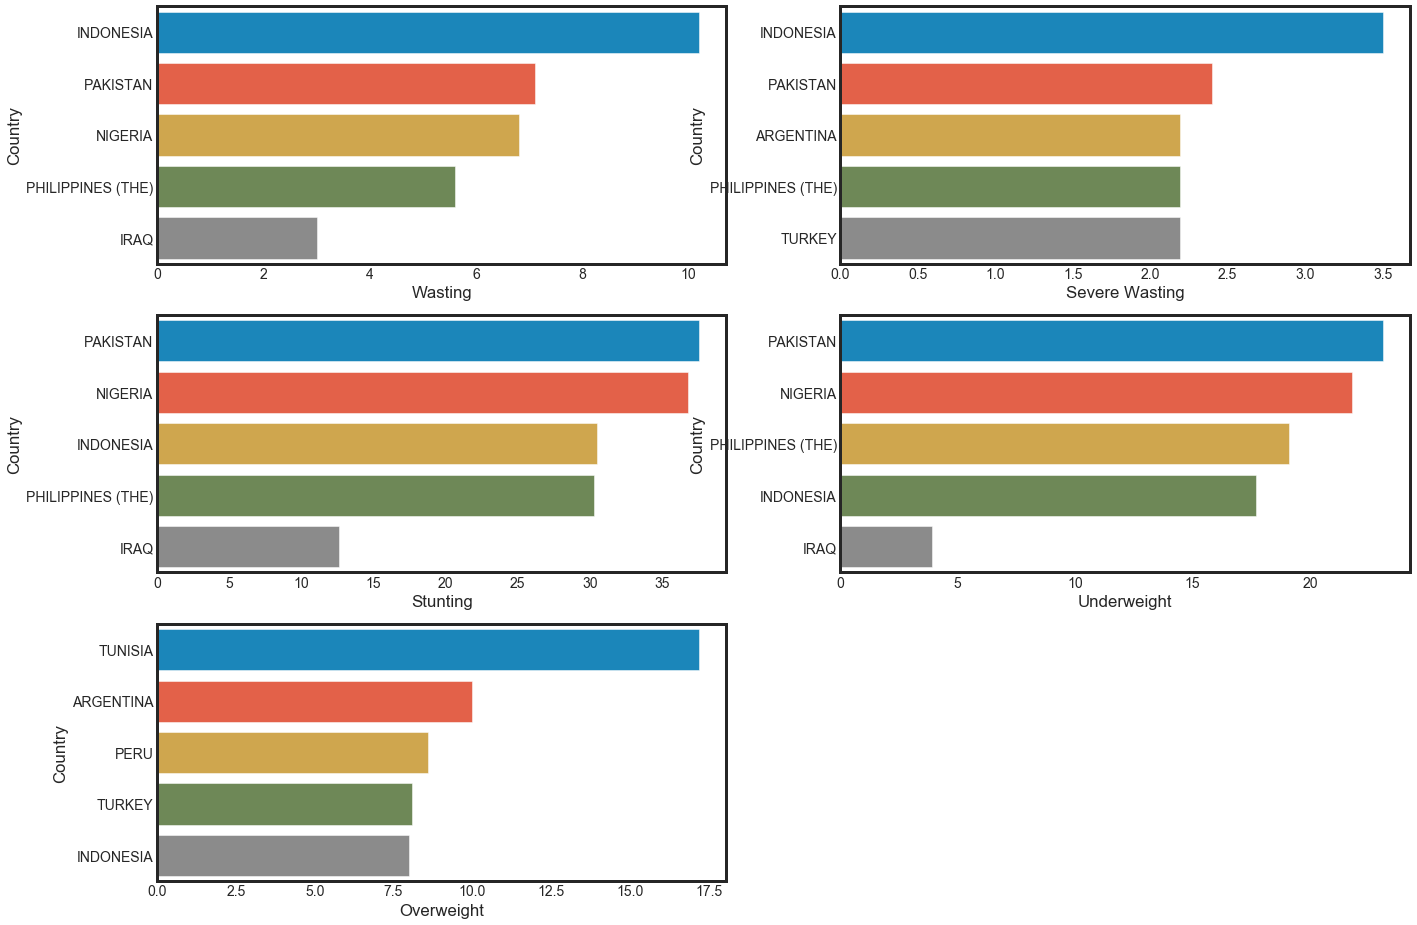

In [126]:
fig =plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(3,2,1)
ax2 =fig.add_subplot(3,2,2)
ax3 =fig.add_subplot(3,2,3)
ax4 =fig.add_subplot(3,2,4)
ax5 =fig.add_subplot(3,2,5)


sns.barplot(data =severe_wasting_df3,ax=ax2, y='Country', x='Severe Wasting')
sns.barplot(data =wasting_df3,ax=ax1, y='Country', x='Wasting')
sns.barplot(data =stunting_df3,ax=ax3, y='Country', x='Stunting')
sns.barplot(data =underweight_df3,ax=ax4, y='Country', x='Underweight')
sns.barplot(data =overweight_df3,ax=ax5, y='Country', x='Overweight')
plt.show()

In [127]:
SID['Country'].value_counts().head()

JAMAICA                     20
DOMINICAN REPUBLIC (THE)     8
GUYANA                       6
HAITI                        6
MALDIVES                     5
Name: Country, dtype: int64

In [128]:
LLDC['Country'].value_counts().head()

MALAWI                              15
BURKINA FASO                        13
BOLIVIA (PLURINATIONAL STATE OF)    11
TAJIKISTAN                          11
NIGER (THE)                         11
Name: Country, dtype: int64

In [140]:
app = dash.Dash()
df= px.data.tips()# Build App


body = {
    'background-color':'#000000',
    'border': '5px solid black',
    'margin': '30px',
    'box-shadow': '5px 10px',
    'color': 'white',
    'font-family': "Lucida Sans"   
    
}



test_png = 'und.png'
test_base64 = base64.b64encode(open(test_png, 'rb').read()).decode('ascii')

test_png_1 = 'stu.png'
test_base64_1 = base64.b64encode(open(test_png_1, 'rb').read()).decode('ascii')

test_png_2 = 'und1.png'
test_base64_2 = base64.b64encode(open(test_png_2, 'rb').read()).decode('ascii')

test_png_3 = 'stu1.png'
test_base64_3= base64.b64encode(open(test_png_3, 'rb').read()).decode('ascii')

test_png_4 = 'both.png'
test_base64_4 = base64.b64encode(open(test_png_4, 'rb').read()).decode('ascii')

test_png_5= 'both1.png'
test_base64_5= base64.b64encode(open(test_png_5, 'rb').read()).decode('ascii')







app.layout = html.Div(id='Main-div',style=body, children=[
    html.Div(
    html.H1("MALNUTRITION-ESTIMATES-WORLD ",
            style={'text-align': 'center','font-family':'Helvetica' })),
    
     dcc.Graph(figure=fig1),
    dcc.Graph(figure=fig24),
    dcc.Graph(figure=fig25),
    dcc.Graph(figure=fig26),
    
     
     html.H2("YEAR-WISE-PARAMETER-ESTIMATE",
            style={'text-align': 'center','font-family':'Helvetica' }),
    
     
     dcc.Graph(figure=fig2),
    
     dcc.Graph(figure=fig3),
    html.H2("COUNTRY-WISE-PARAMETER-ESTIMATE",
            style={'text-align': 'center','font-family':'Helvetica' }),
     dcc.Graph(figure=fig4),
    dcc.Graph(figure=fig5),
    dcc.Graph(figure=fig6),
    dcc.Graph(figure=fig7),
    dcc.Graph(figure=fig8),
    dcc.Graph(figure=fig9),
    dcc.Graph(figure=fig10),
    dcc.Graph(figure=fig11),
    html.H2("HIGHEST-PARAMETER-ESTIMATE(COUNTRY)",
            style={'text-align': 'center','font-family':'Helvetica' }),
    dcc.Graph(figure=fig12),
    dcc.Graph(figure=fig13),
    dcc.Graph(figure=fig14),
    dcc.Graph(figure=fig15),
    dcc.Graph(figure=fig16),
    html.H2("HIGHEST-PARAMETER-COUNT(COUNTRY)",
            style={'text-align': 'center','font-family':'Helvetica' }),
    dcc.Graph(figure=fig17),
    dcc.Graph(figure=fig18),
    dcc.Graph(figure=fig19),
    dcc.Graph(figure=fig20),
    dcc.Graph(figure=fig21),
     html.H2("Low Developed Countries Vs Developing Countries",
            style={'text-align': 'center','font-family':'Helvetica' }),
    html.Img(src='data:image/png;base64,{}'.format(test_base64),style={'height':'30%', 'width':'50%','textAlign': 'center'}),
    html.Img(src='data:image/png;base64,{}'.format(test_base64_1),style={'height':'30%', 'width':'50%','textAlign': 'center'}),
    html.H2("Low Income Food Deficient & Non Low Income Food Deficient",
            style={'text-align': 'center','font-family':'Helvetica' }),
    html.Img(src='data:image/png;base64,{}'.format(test_base64_2),style={'height':'30%', 'width':'50%','textAlign': 'center'}),
    html.Img(src='data:image/png;base64,{}'.format(test_base64_3),style={'height':'30%', 'width':'50%','textAlign': 'center'}),
    html.H2("Countries With Both LDC & LIFD ---- Both DC & NLIFD",
            style={'text-align': 'center','font-family':'Helvetica' }),
    html.Img(src='data:image/png;base64,{}'.format(test_base64_4),style={'height':'30%', 'width':'50%','textAlign': 'center'}),
    html.Img(src='data:image/png;base64,{}'.format(test_base64_5),style={'height':'30%', 'width':'50%','textAlign': 'center'}),
     html.H2("Landlocked Developing Countries vs Small Island Developing states vs Others",
            style={'text-align': 'center','font-family':'Helvetica' }),
    dcc.Graph(figure=fig23)
    
])







    



In [141]:
if __name__ == '__main__':
    app.run_server(debug=True,use_reloader=False,port=8052)#debug=True,use_reloader=False

Dash is running on http://127.0.0.1:8052/

Dash is running on http://127.0.0.1:8052/

Dash is running on http://127.0.0.1:8052/

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
